# Homework : 7 Machine Learning - 1 (Supervised Methods)

## Perform a grid search over the following hyper-parameters:
## • 𝜂 ∈ {0.001,0.01, 0.1}
## • 𝜆∈{1𝑒−4,1𝑒−3,1𝑒−2}
## • Number of hidden nodes 𝑀 ∈ {40,80, 160}

### Importing all necessary libraries

In [1]:
import time
import pickle
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras import Model

from utils.engine import Classifier, MyModel

tf.config.run_functions_eagerly(True)

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


### Loading the saved training and test data


In [2]:
train_images = np.load("./dataset/Fashion_Mnist/train_images.npy")
train_labels = np.load("./dataset/Fashion_Mnist/train_labels.npy")
test_images = np.load("./dataset/Fashion_Mnist/test_images.npy")
test_labels = np.load("./dataset/Fashion_Mnist/test_labels.npy")

### Instantiating an object for the Classifier class in engine.py

In [3]:
clf = Classifier()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



### Splitting the training data into train data and validation data (80/20 split)

In [4]:
X_test = test_images
T_test = test_labels
(X_train, T_train), (X_validation, T_validation) = clf.splitTrainData(train_images, train_labels, test_images, validation_split=0.2, printFlag=True)

---------------------------------------------------------------------------------------------
Total number of images in Training data:  48000
Total number of images in Validation data:  12000
Total number of images in Test data:  10000
Total number of classes in the output lables: 10
---------------------------------------------------------------------------------------------


### Normalizing the pixel values.

In [5]:
X_train, X_validation, X_test = X_train / 255.0, X_validation / 255.0, X_test / 255.0


## Intializing the three lists for learning_rates, regularization_parameters and hidden_nodes and also fixing the batch size for the training and validation data.

In [6]:
learning_rates = [0.001, 0.01, 0.1]
regularization_parameters = [0.0001, 0.001, 0.01]
hidden_nodes_list = [40, 80, 160]

In [7]:
train_ds, validation_ds = clf.setBatchSize(32, X_train, T_train, X_validation, T_validation)


In [8]:
result = {
    40: {
        0.001: {
            0.0001: [],
            0.001: [],
            0.01 : []
        },

        0.01: {
            0.0001: [],
            0.001: [],
            0.01 : []
        },

        0.1: {
            0.0001: [],
            0.001: [],
            0.01 : []
        }
    },

    80:{
      0.001: {
            0.0001: [],
            0.001: [],
            0.01 : []
        },

        0.01: {
            0.0001: [],
            0.001: [],
            0.01 : []
        },

        0.1: {
            0.0001: [],
            0.001: [],
            0.01 : []
        }

    },

    160: {
        0.001: {
            0.0001: [],
            0.001: [],
            0.01 : []
        },

        0.01: {
            0.0001: [],
            0.001: [],
            0.01 : []
        },

        0.1: {
            0.0001: [],
            0.001: [],
            0.01 : []
        }
    }
}

final_combination = {
    "hidden_units": None,
    "learning_rate" : None,
    "reg_param": None
}    
        
final_validation_accuracy = float("-inf")


In [9]:
combination = 1
for hidden_nodes in hidden_nodes_list:
    for learning_rate in learning_rates:
        for reg_param in regularization_parameters:
            print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
            print(f"Model Training for combination - {combination} ======> hidden_units: {hidden_nodes}, learning rate: {learning_rate} and reg param: {reg_param} ... ")

            new_model = MyModel(hidden_nodes, reg_param, 784)
            train_acc, train_loss, val_acc, val_loss, current_val_acc = clf.training_loop(new_model, train_ds, validation_ds, hidden_nodes, reg_param, learning_rate)
            
            if current_val_acc > final_validation_accuracy:
                final_validation_accuracy = current_val_acc
                final_combination["hidden_units"] = hidden_nodes
                final_combination["learning_rate"] = learning_rate
                final_combination["reg_param"] = reg_param

            result[hidden_nodes][learning_rate][reg_param] = [train_acc, train_loss, val_acc, val_loss]
            
            print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
            print()
            print()

            # if combination == 1:
            #     print(result[hidden_nodes][learning_rate][reg_param])
            
            combination += 1
            

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Model Training for combination - 1 ======> hidden_units: 40, learning rate: 0.001 and reg param: 0.0001 ... 
Epoch -> 30, Validation Accuracy: 83.78333282470703
Time taken to finish 30 EPOCHS on hidden units - 40, reg param = 0.0001 and learning rate - 0.001 ===> 452.75532603263855 secs
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Model Training for combination - 2 ======> hidden_units: 40, learning rate: 0.001 and reg param: 0.001 ... 
Epoch -> 30, Vali

In [11]:
# read python dict back from the file
pkl_file = open('./Result/result.pkl', 'rb')
result = pickle.load(pkl_file)
pkl_file.close()

In [19]:
# read python dict back from the file
pkl_file = open('./Result/finalCombo.pkl', 'rb')
final_combination = pickle.load(pkl_file)
pkl_file.close()

In [20]:
final_combination

{'hidden_units': 160,
 'learning_rate': 0.1,
 'reg_param': 0.001,
 'final_validation_accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=88.308334>}

40 0.001 0.0001


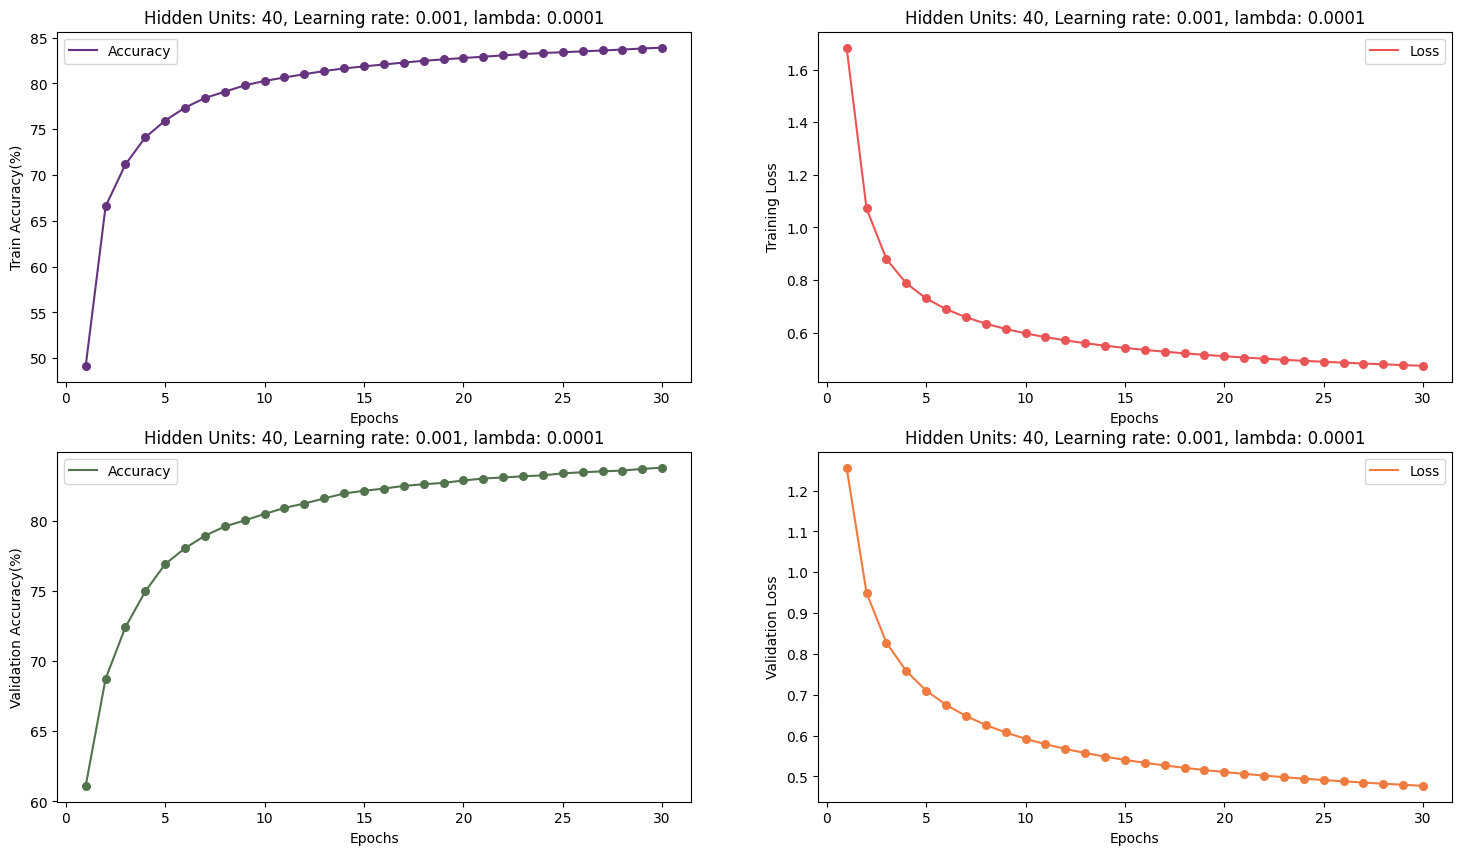

40 0.001 0.001


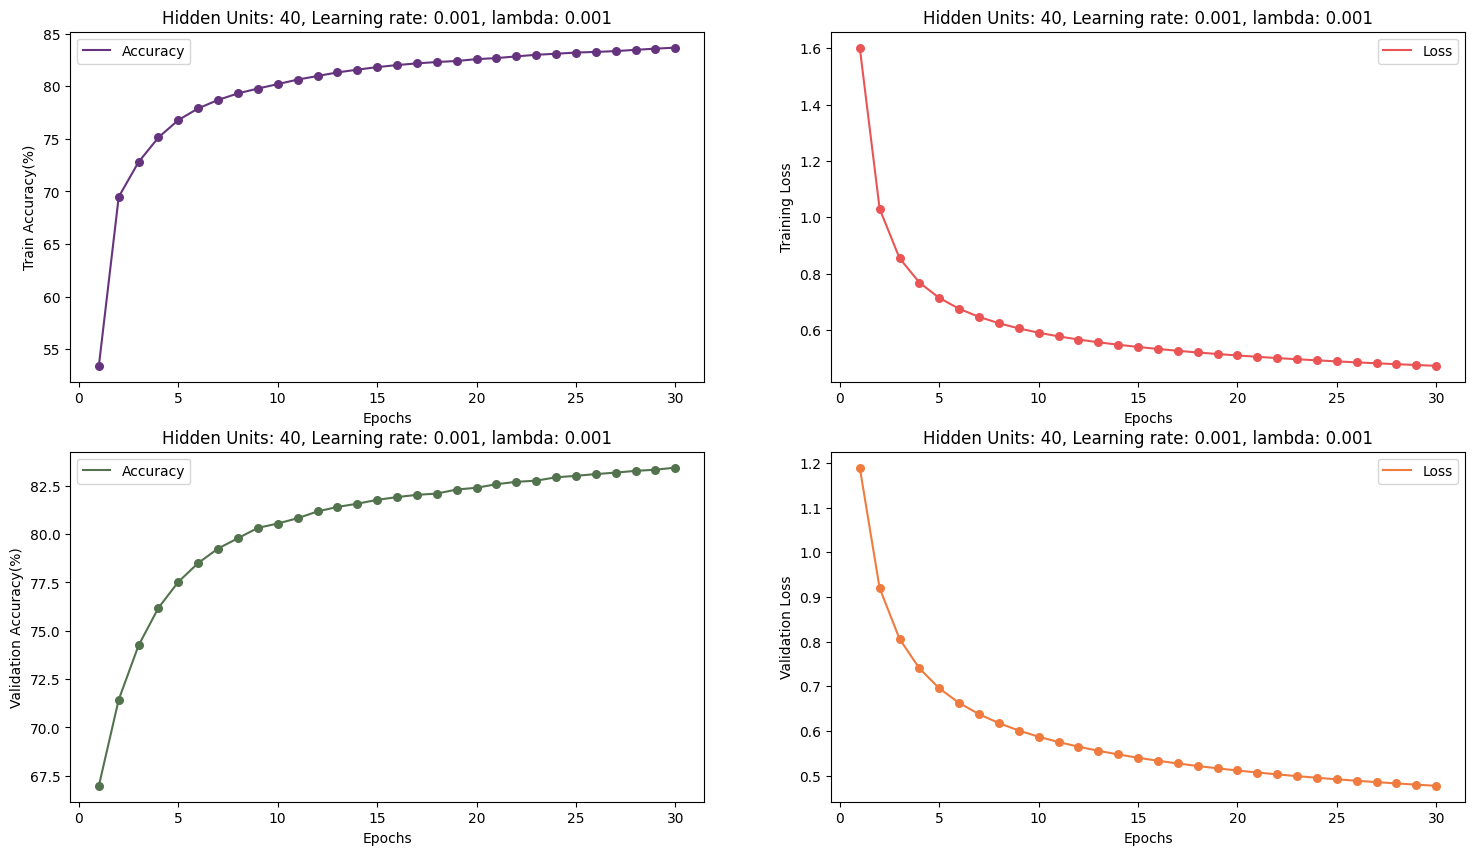

40 0.001 0.01


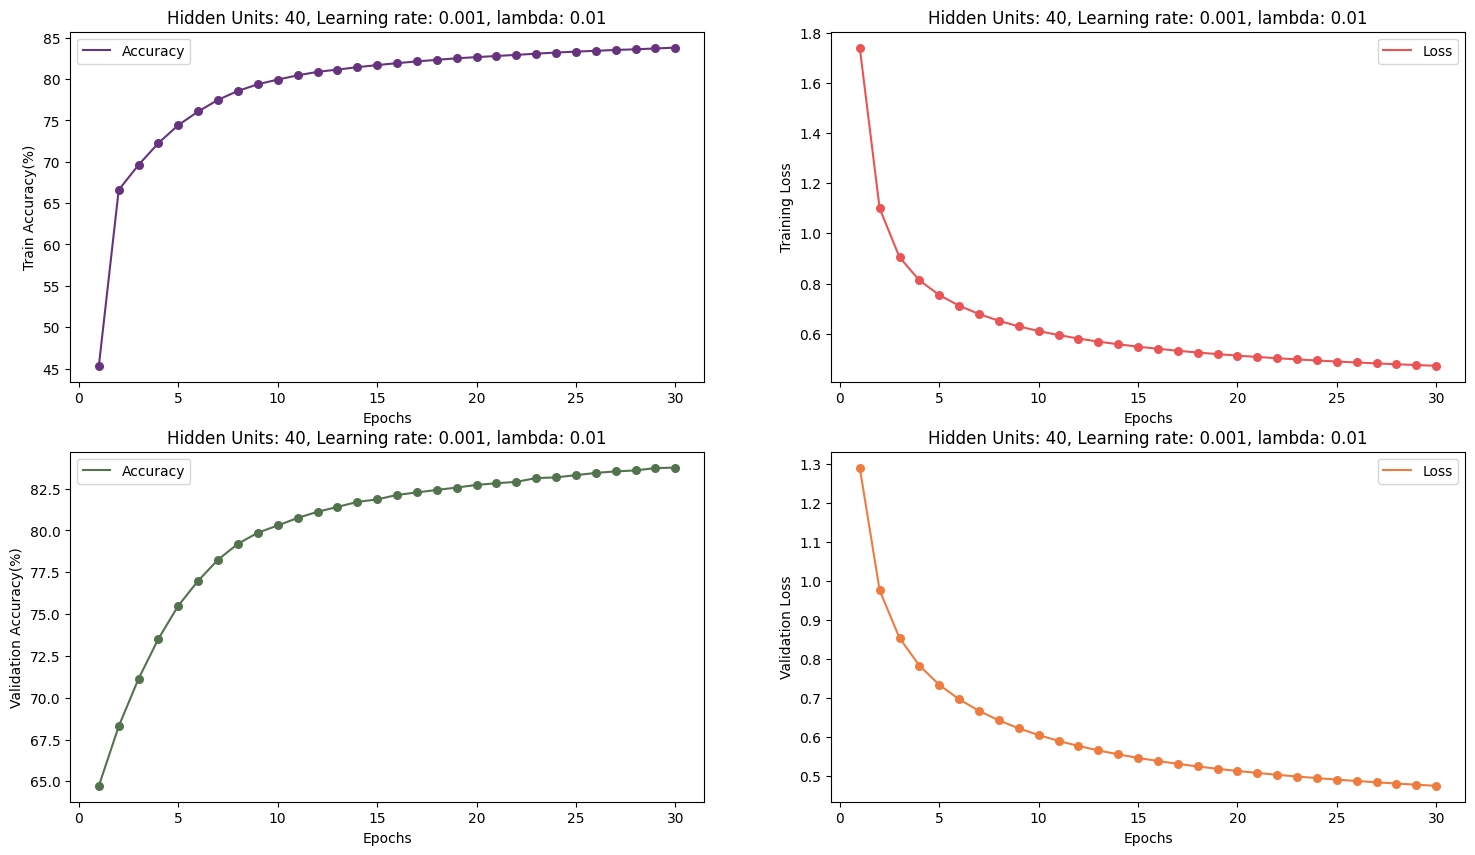

40 0.01 0.0001


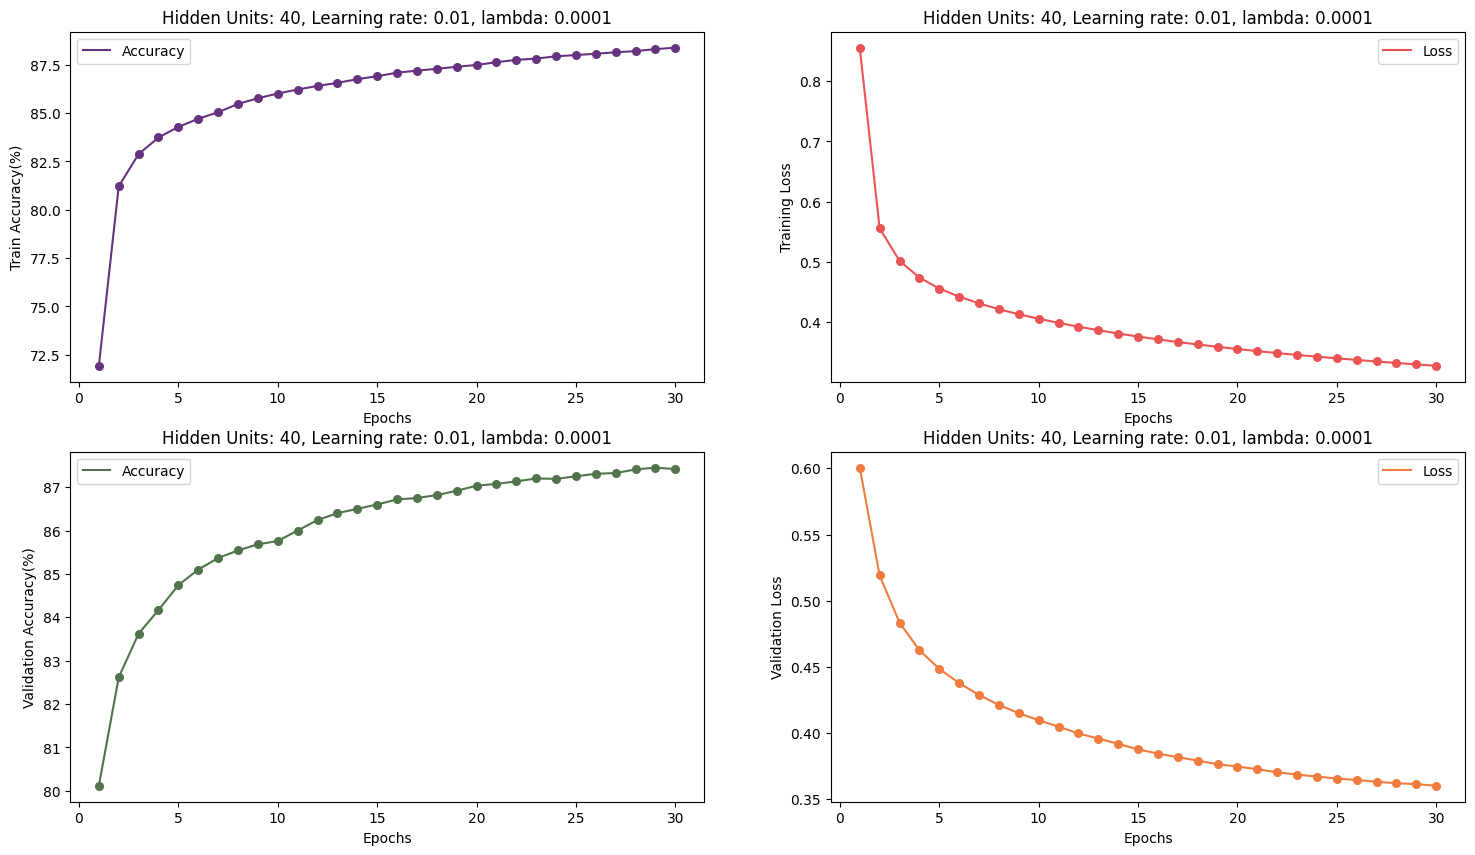

40 0.01 0.001


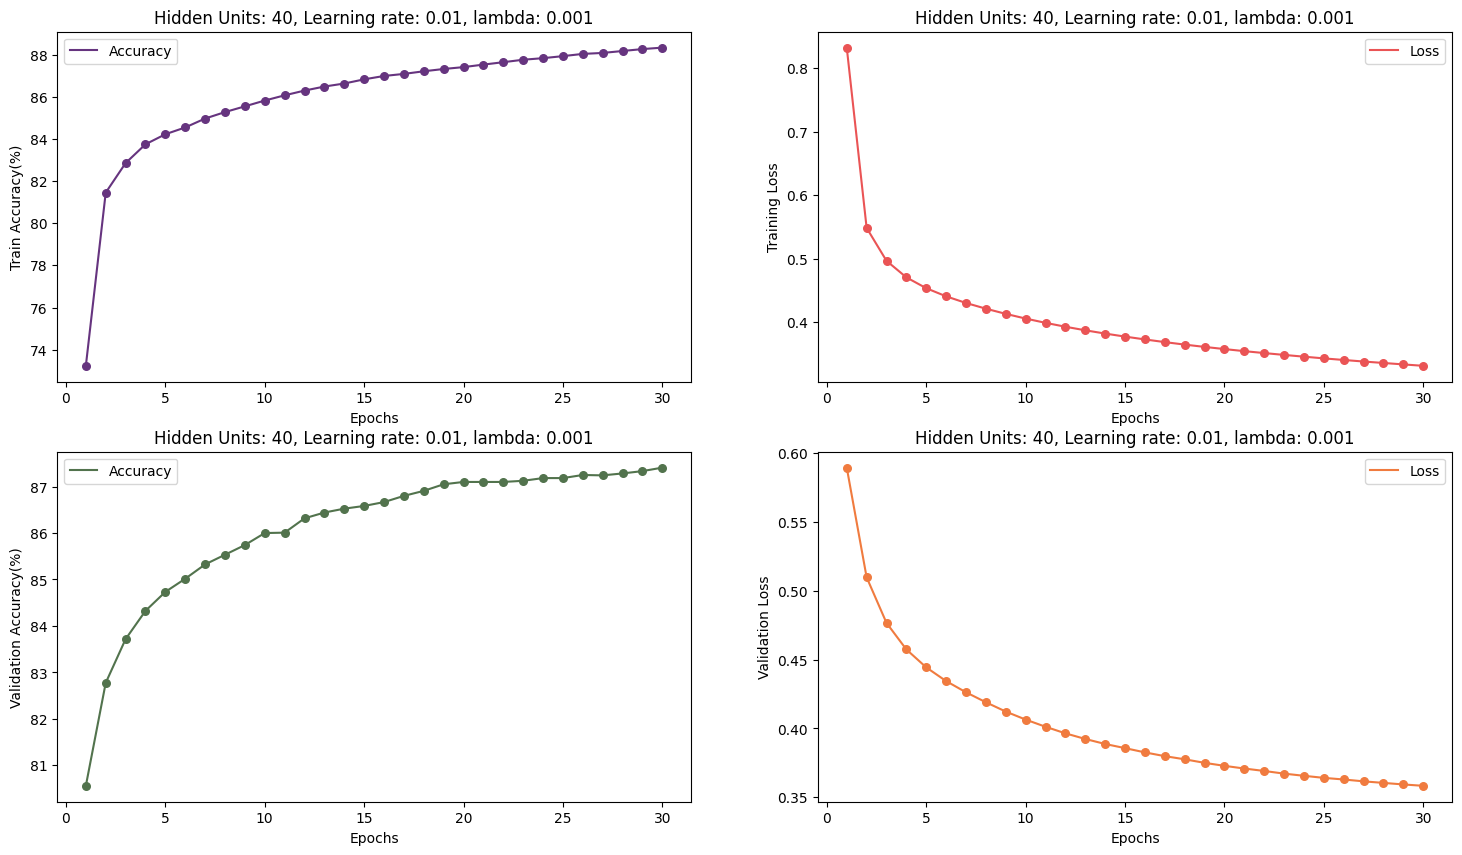

40 0.01 0.01


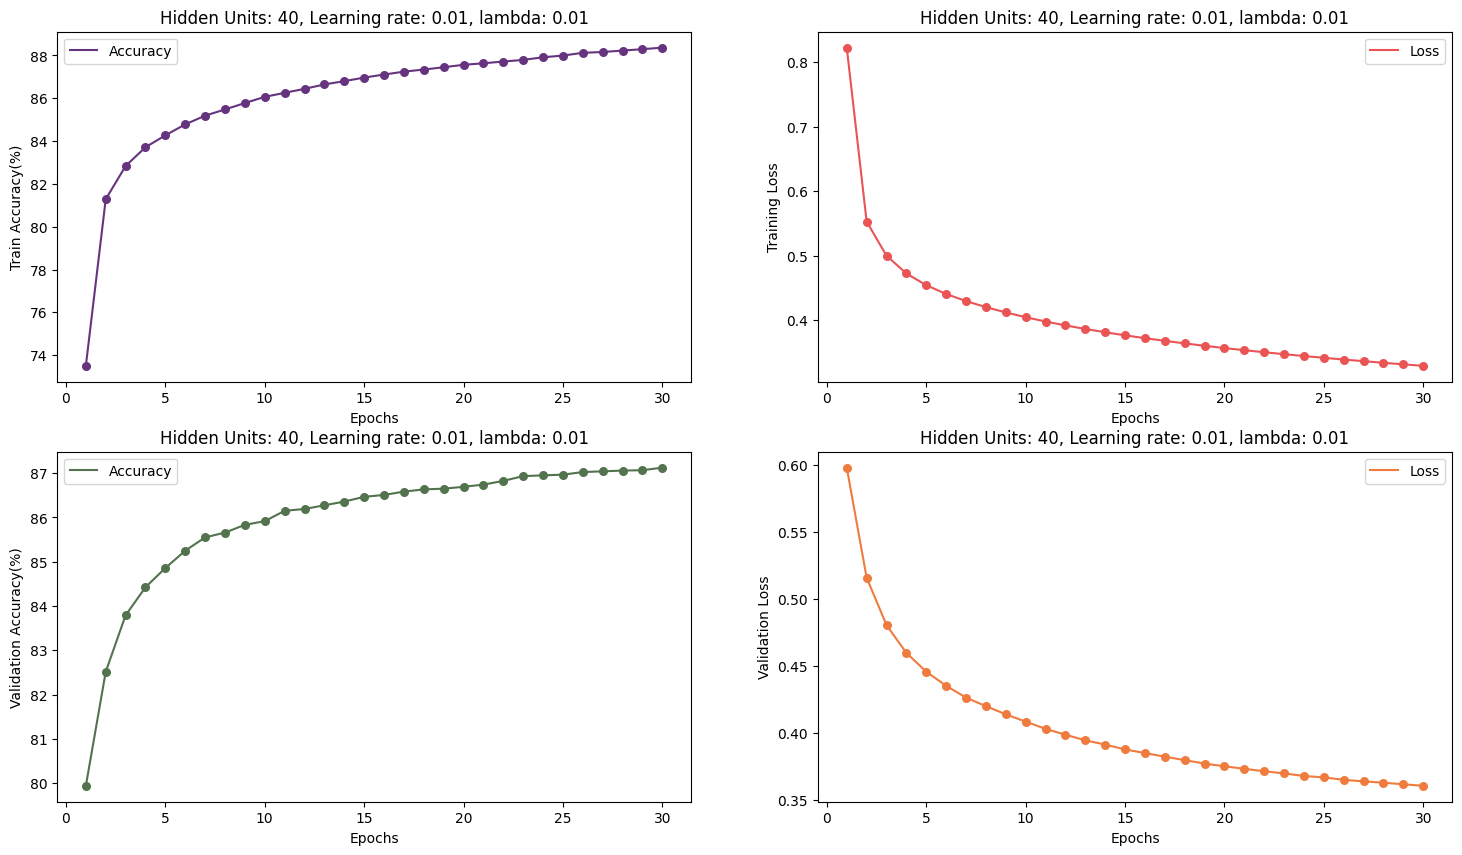

40 0.1 0.0001


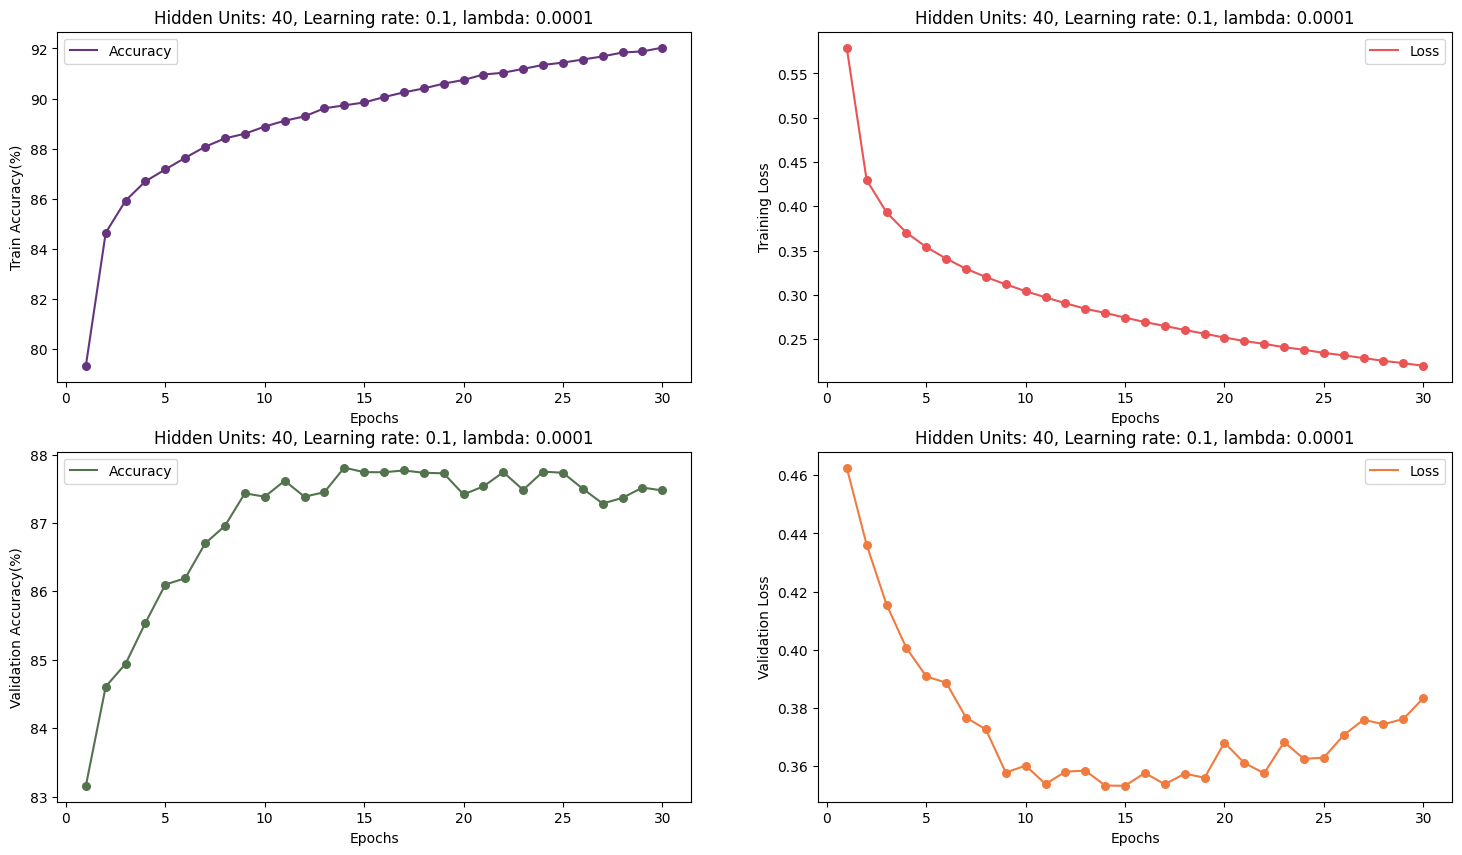

40 0.1 0.001


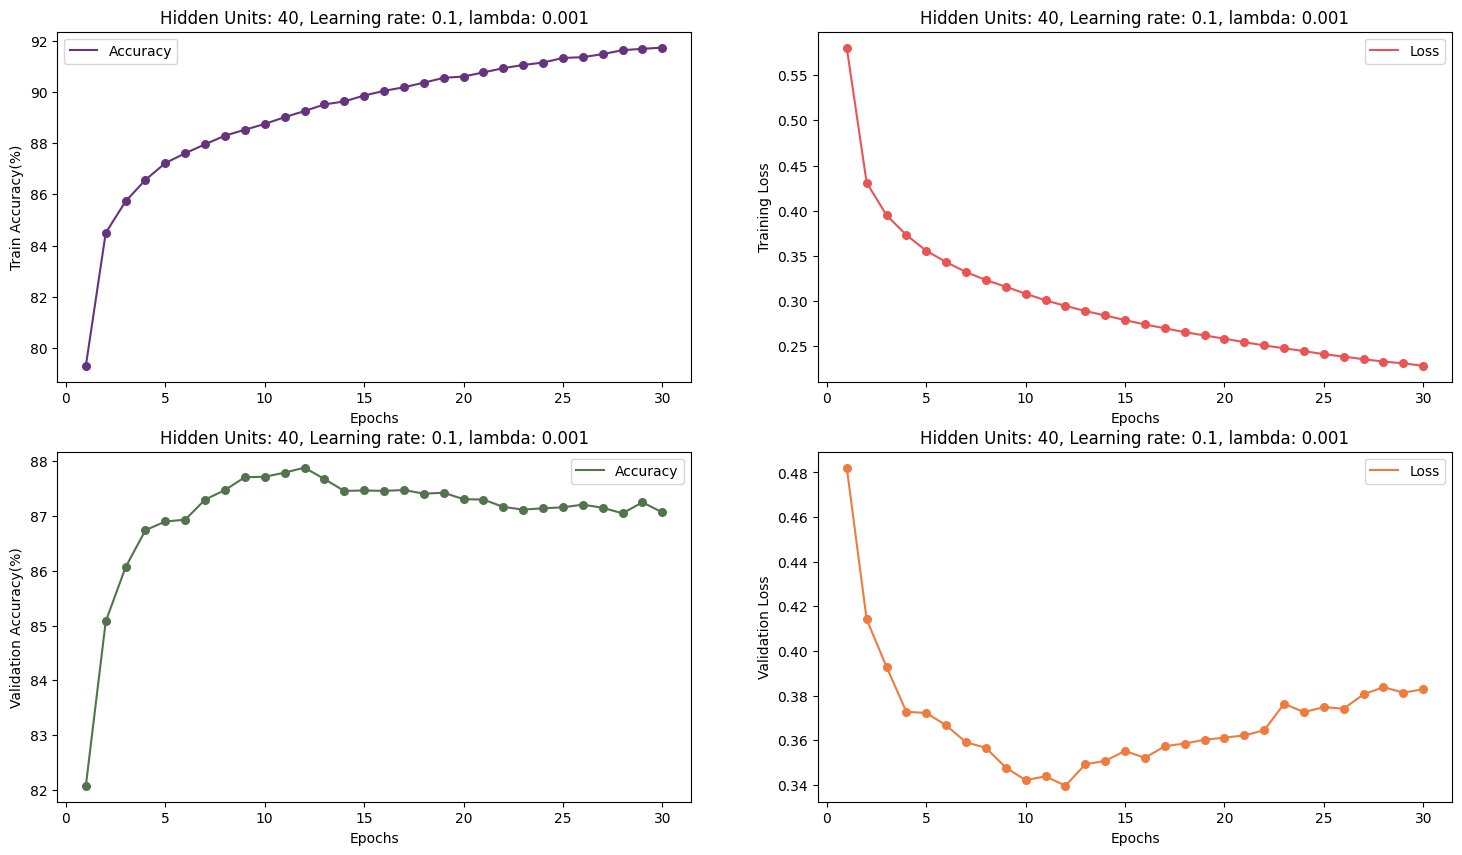

40 0.1 0.01


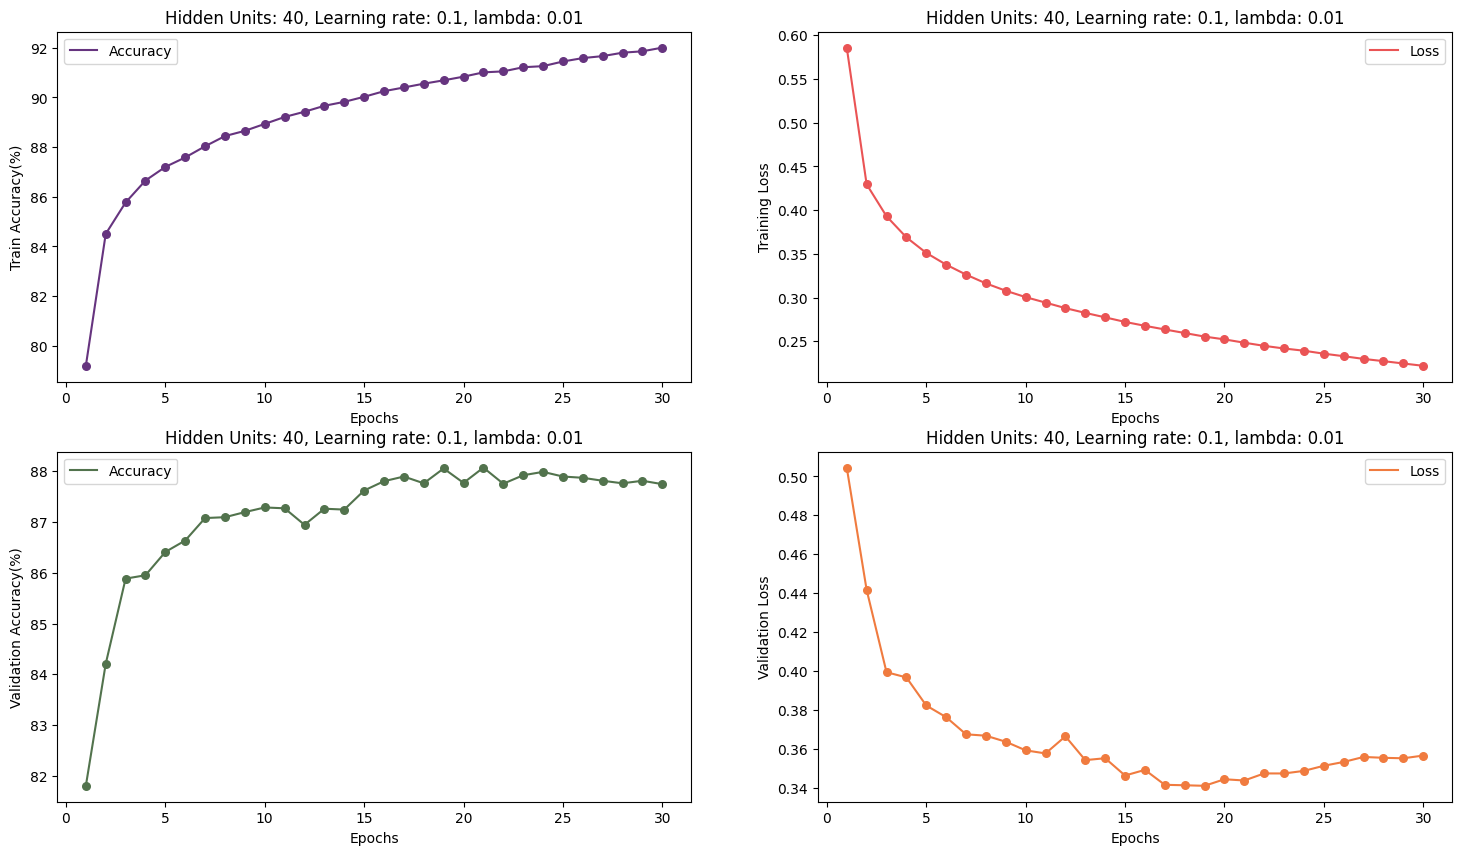

80 0.001 0.0001


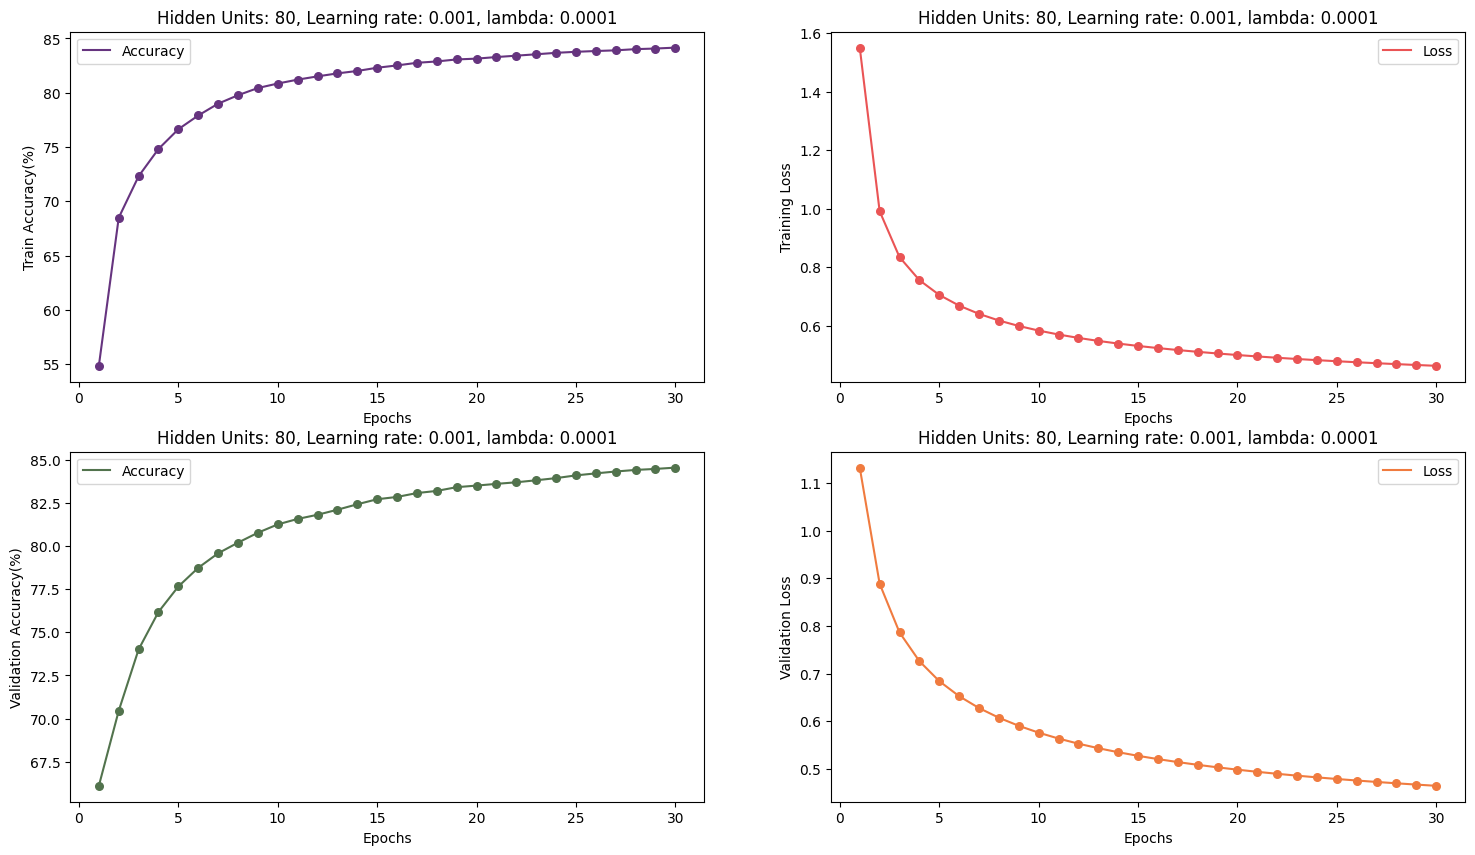

80 0.001 0.001


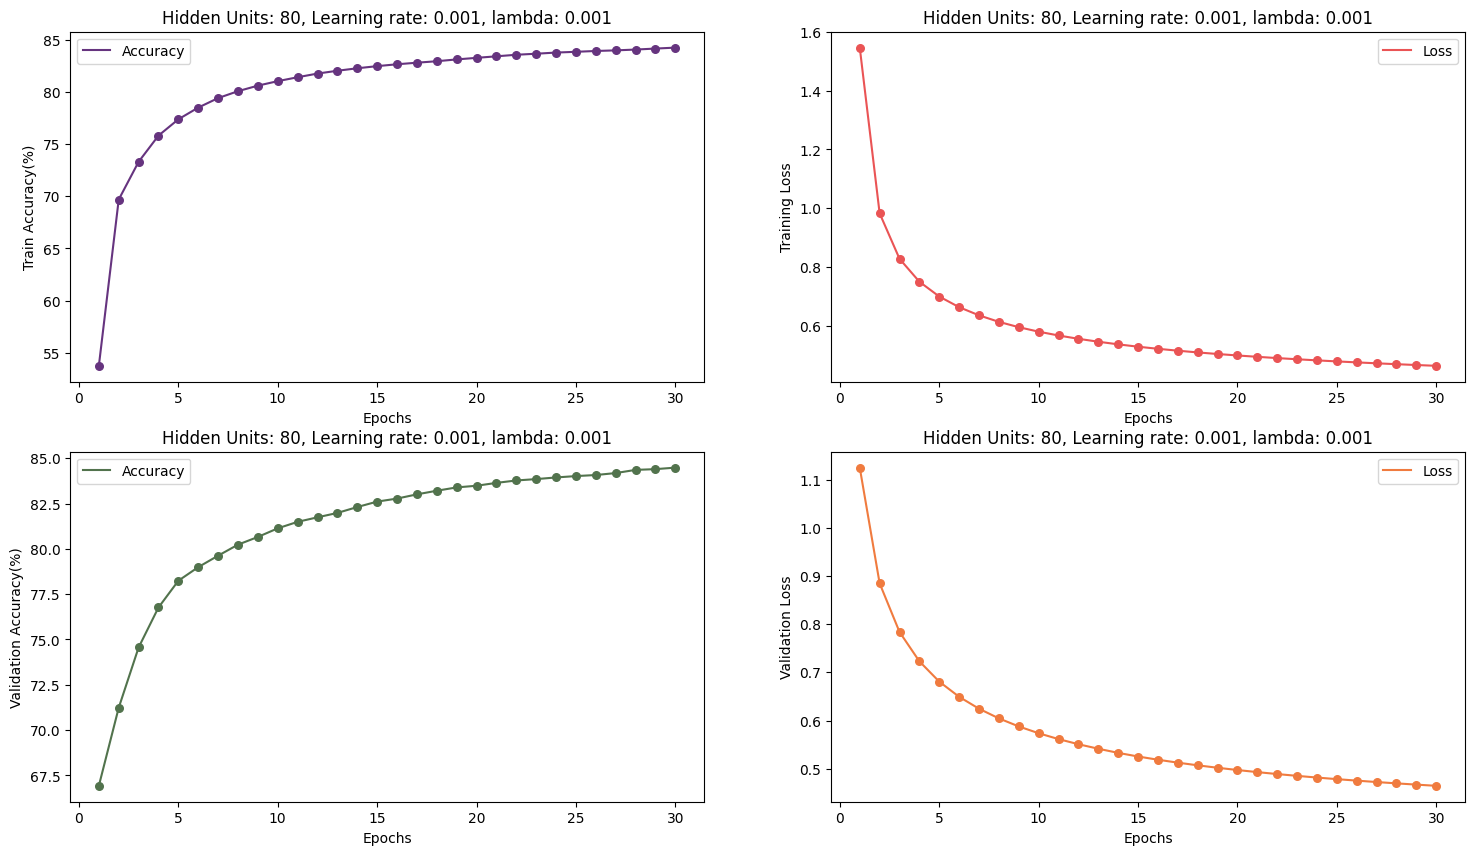

80 0.001 0.01


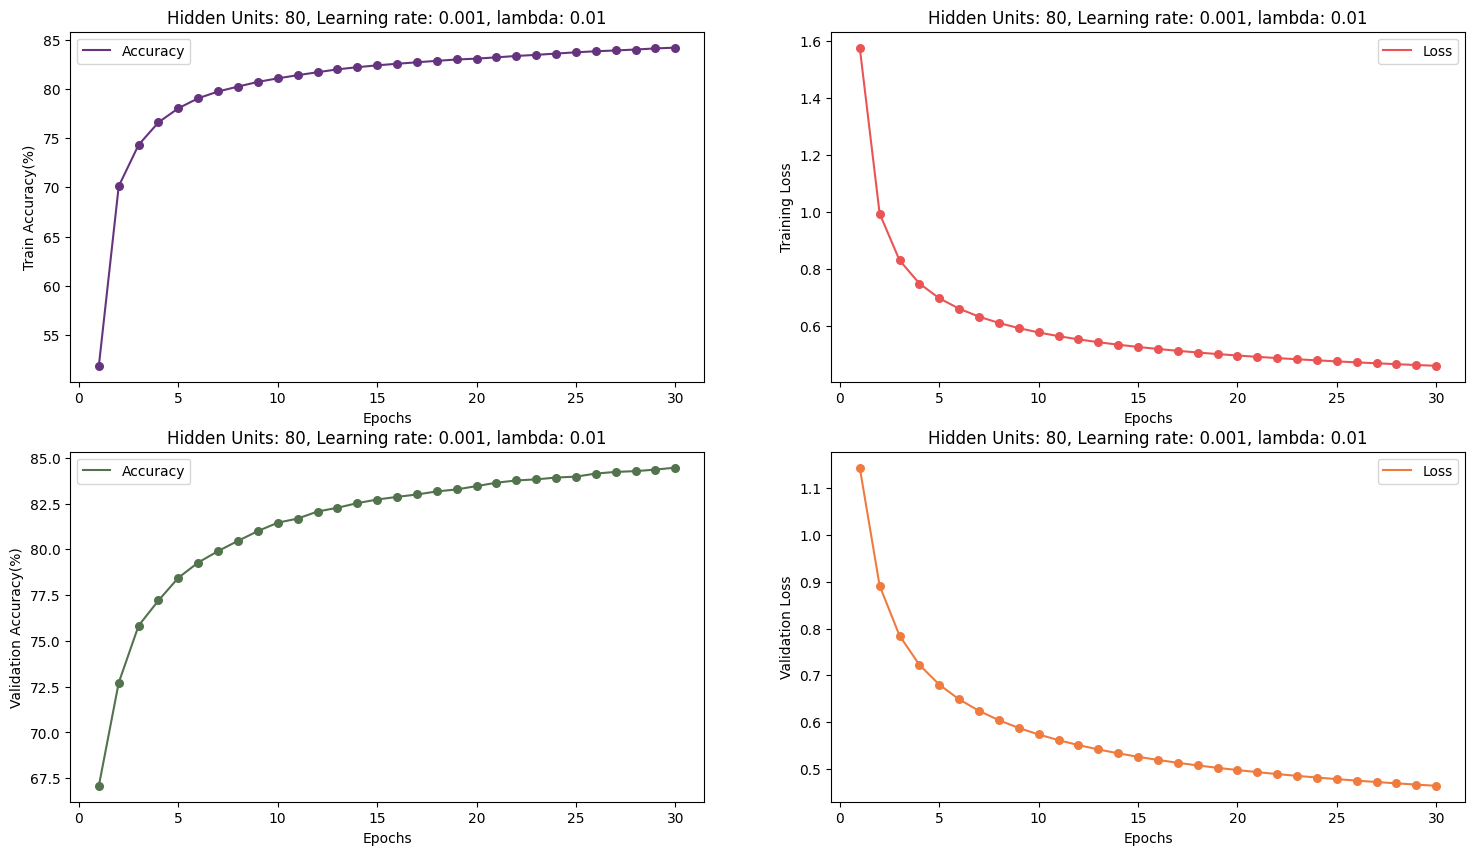

80 0.01 0.0001


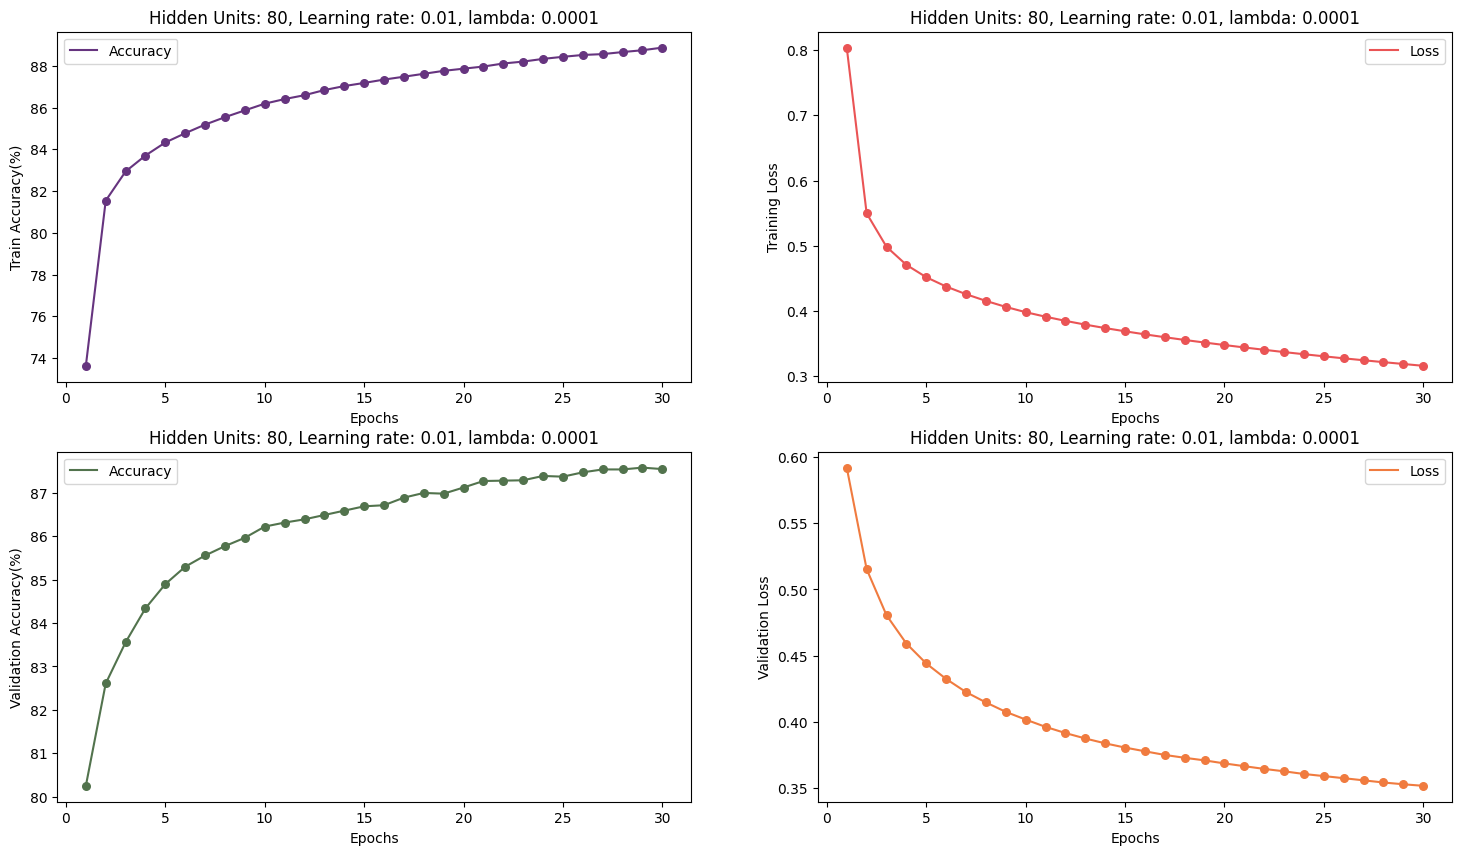

80 0.01 0.001


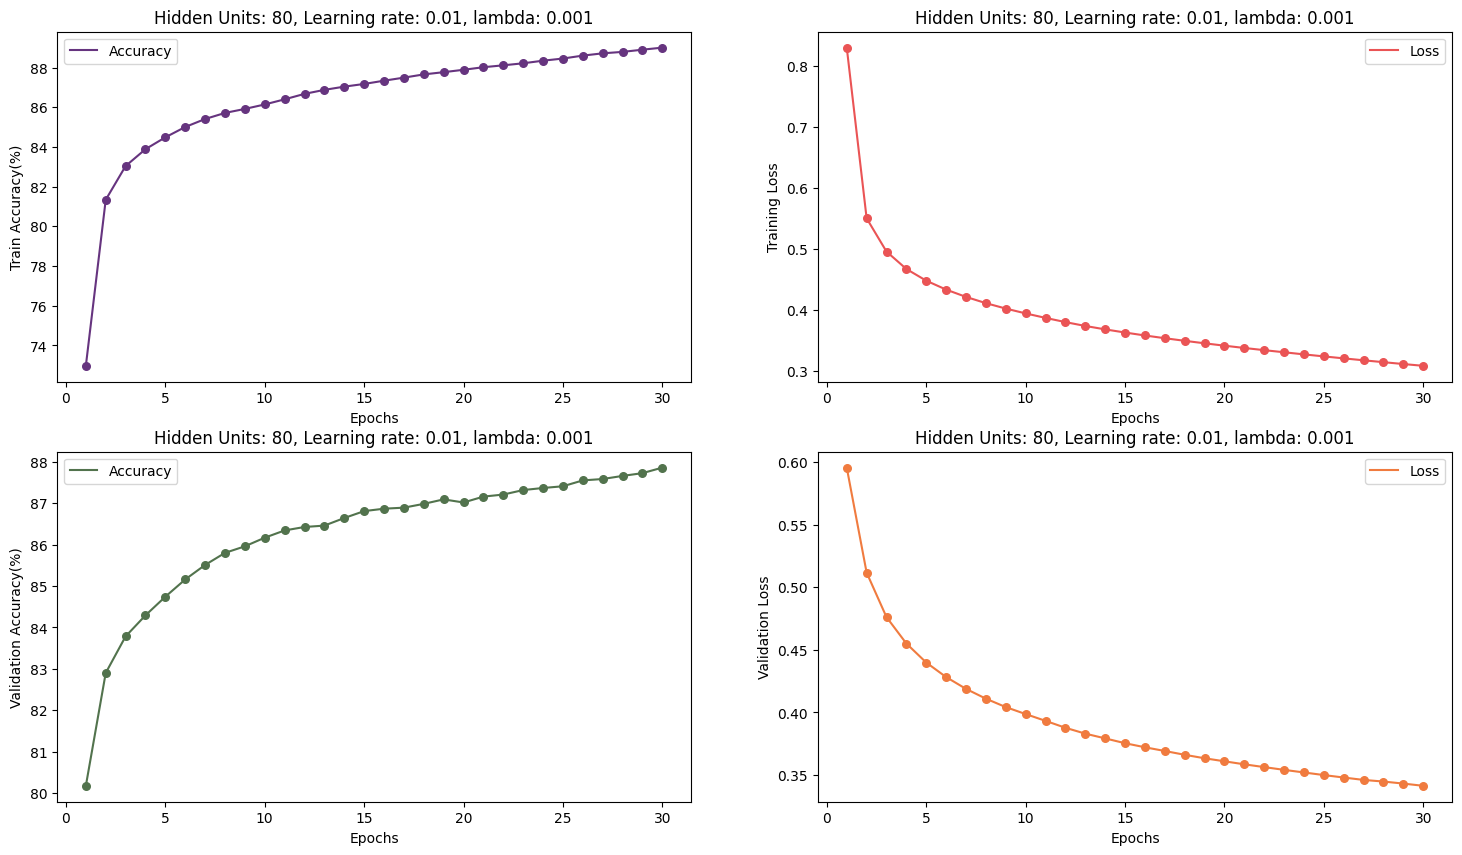

80 0.01 0.01


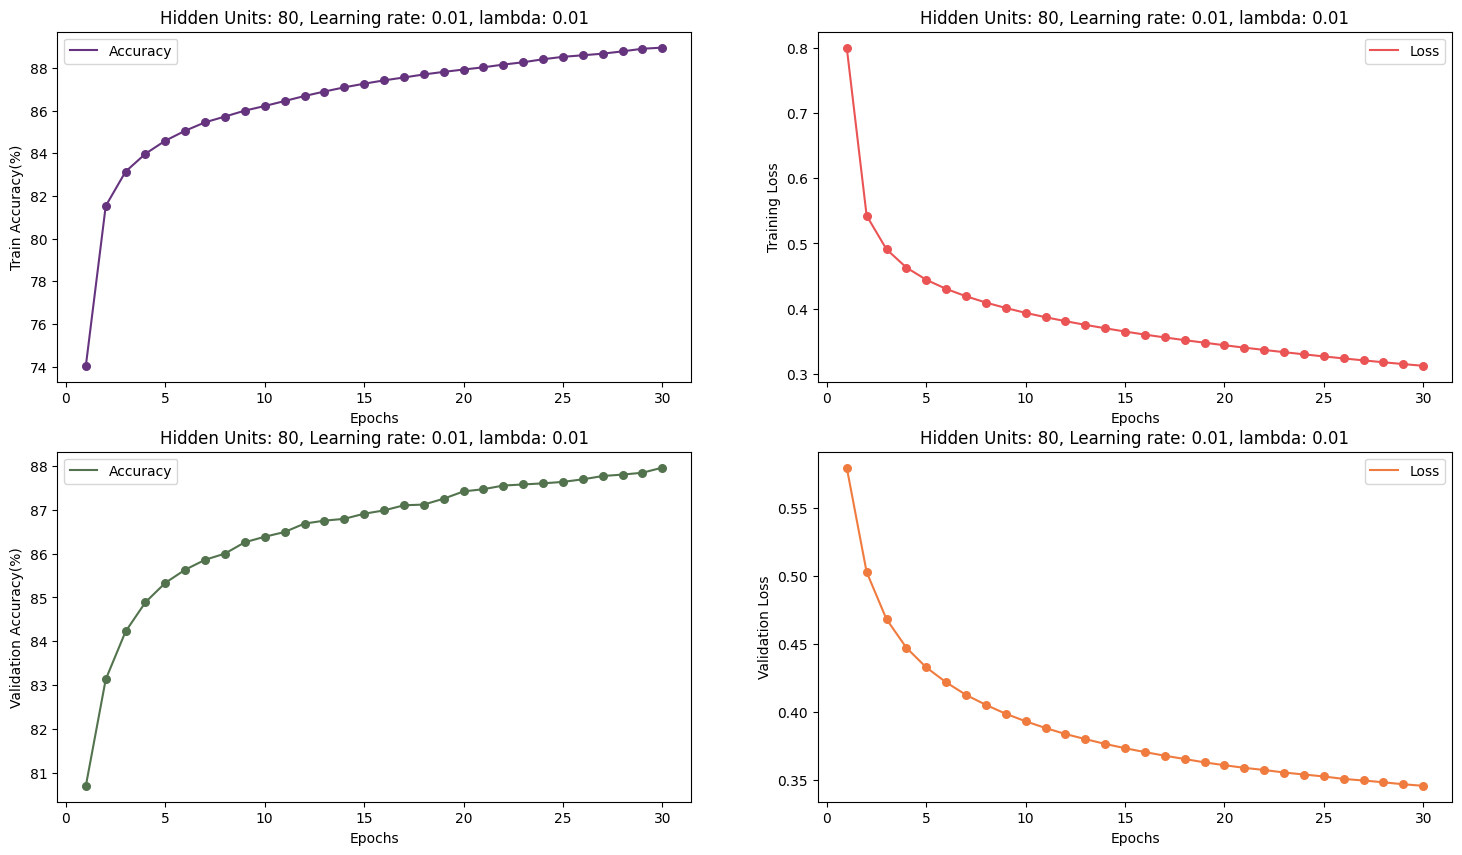

80 0.1 0.0001


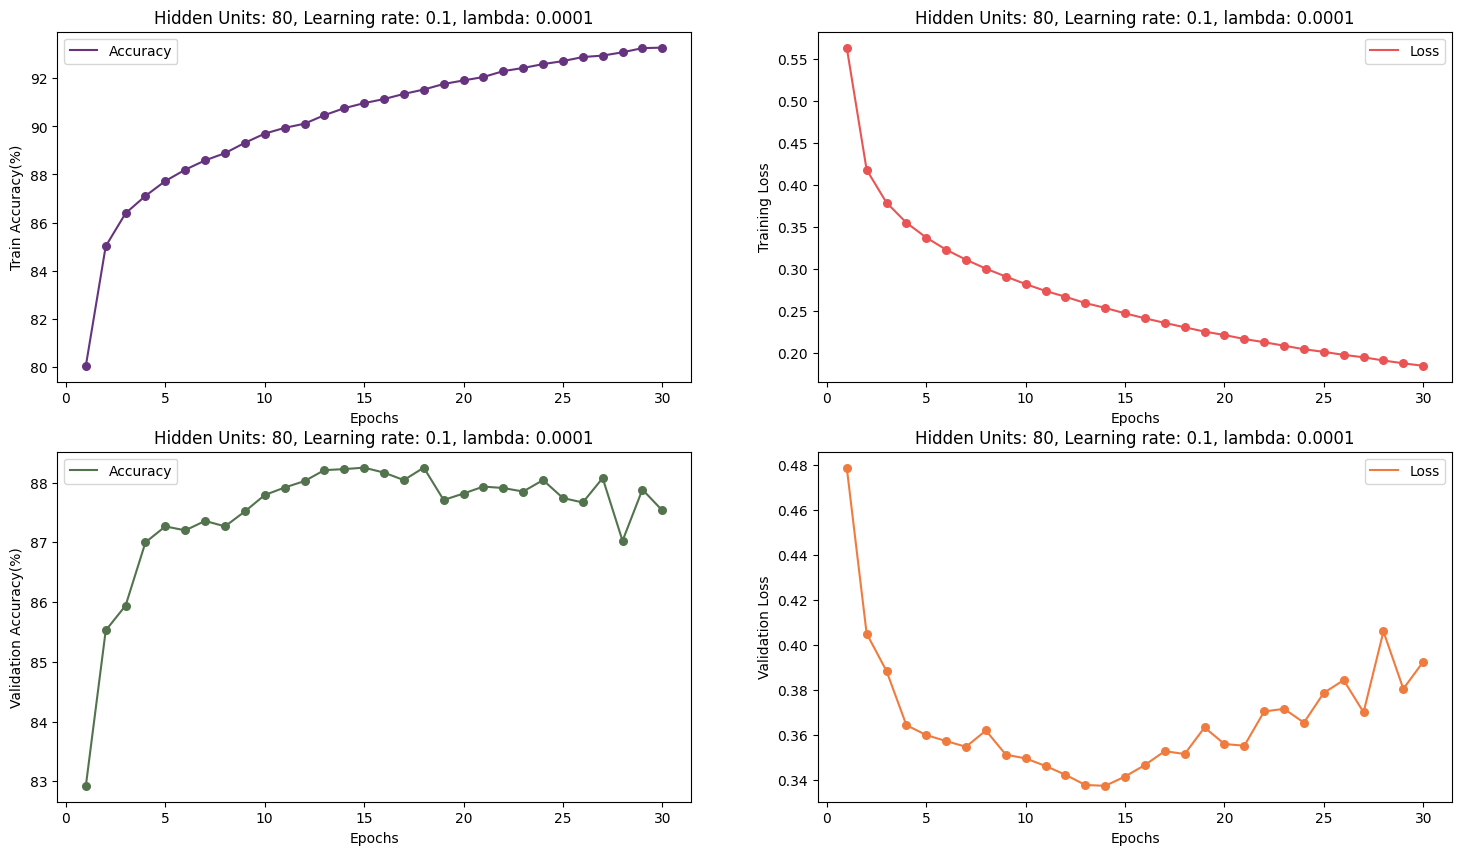

80 0.1 0.001


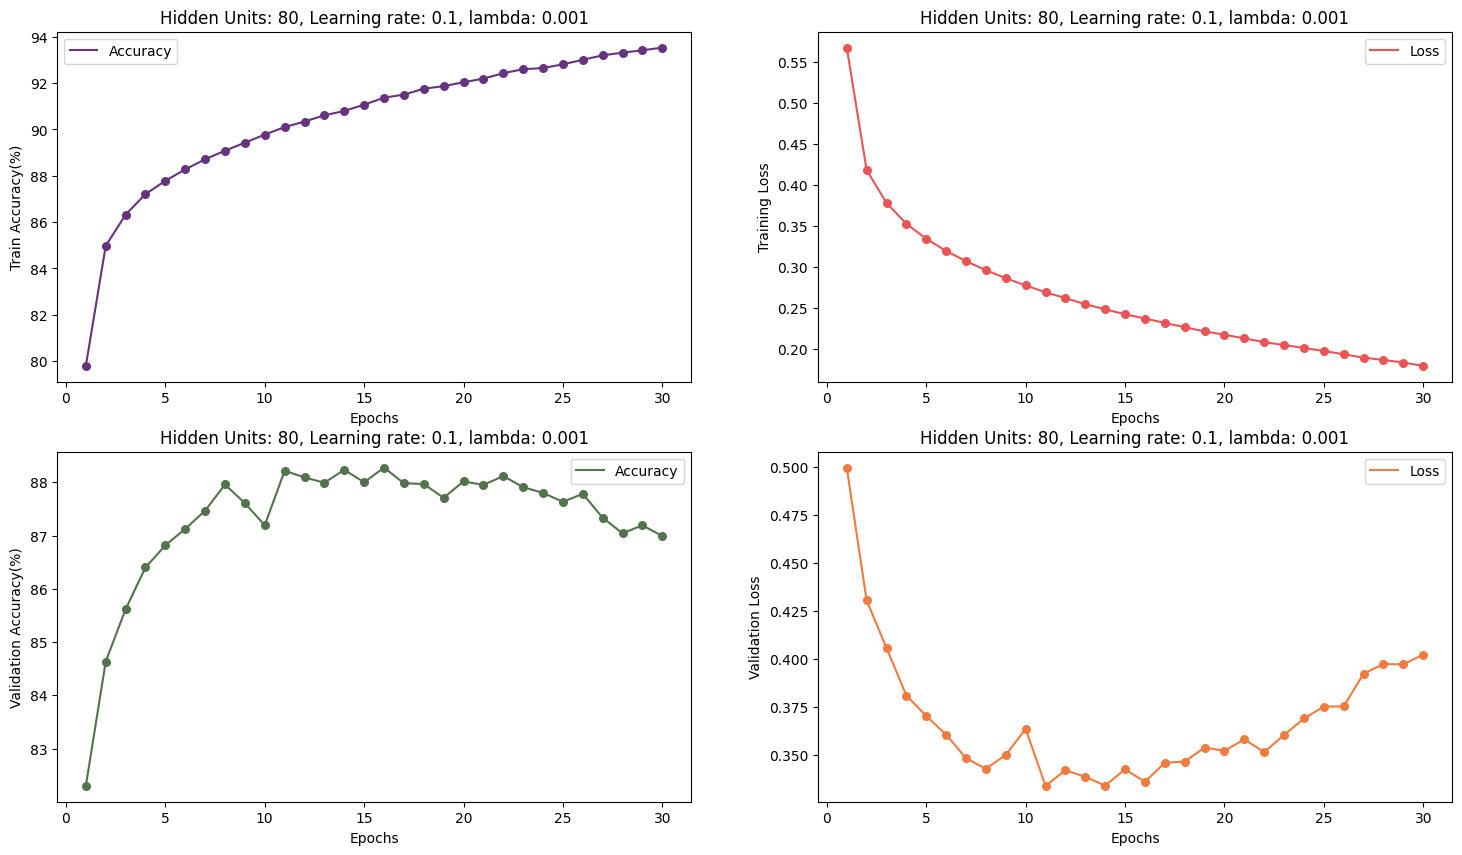

80 0.1 0.01


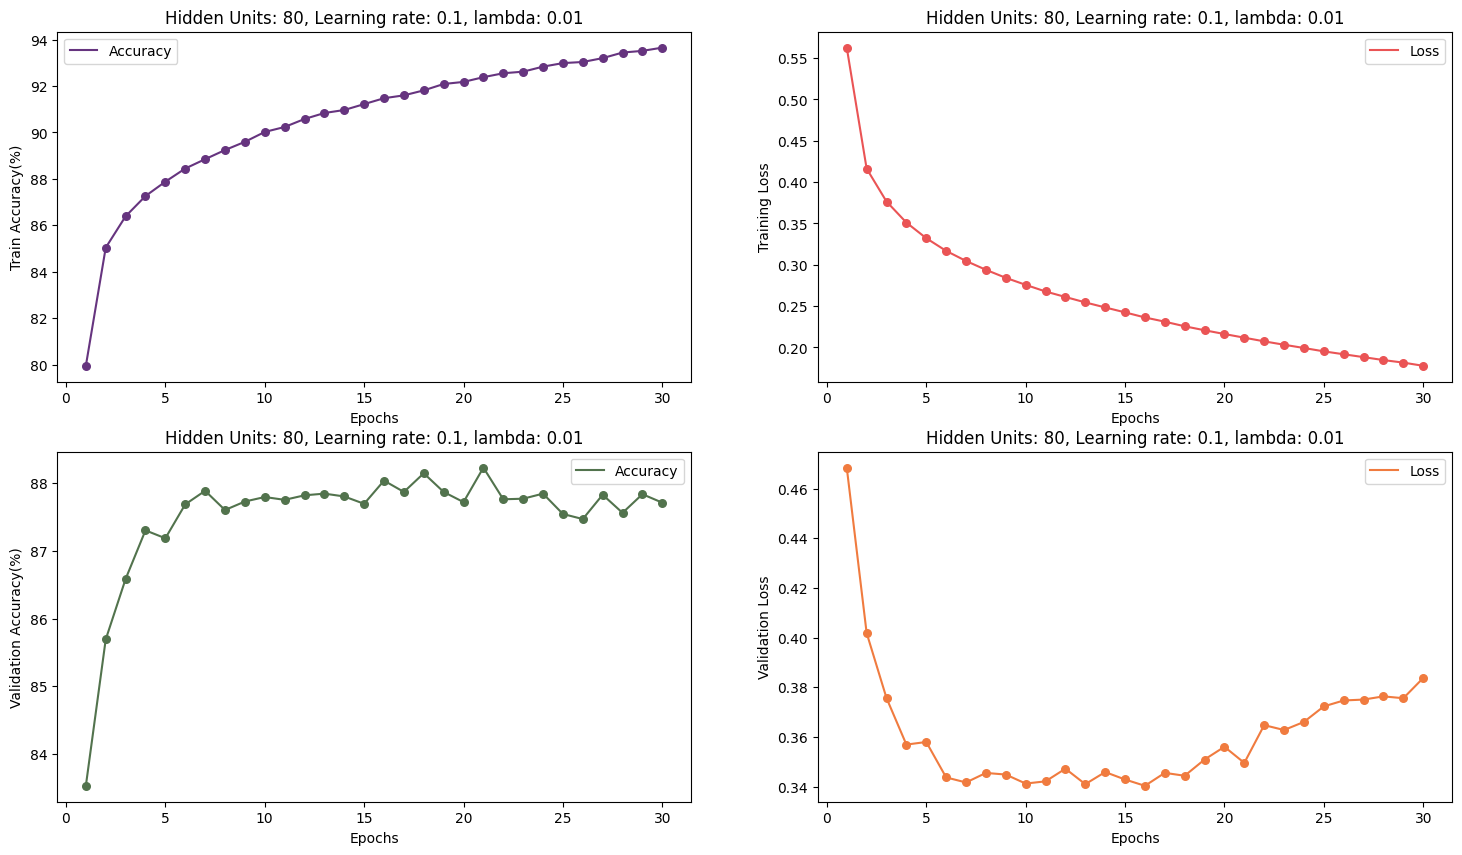

160 0.001 0.0001


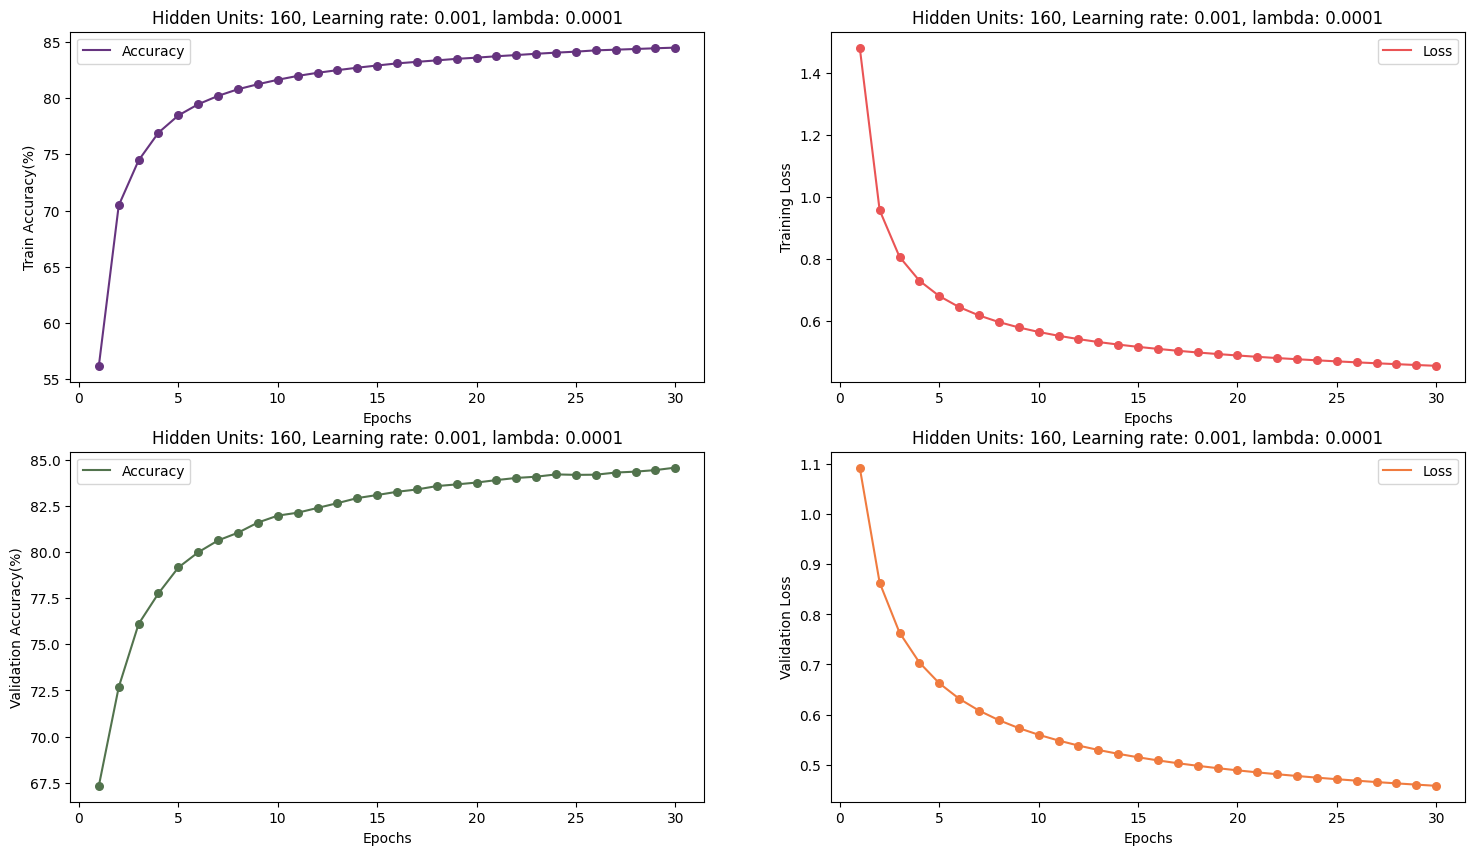

160 0.001 0.001


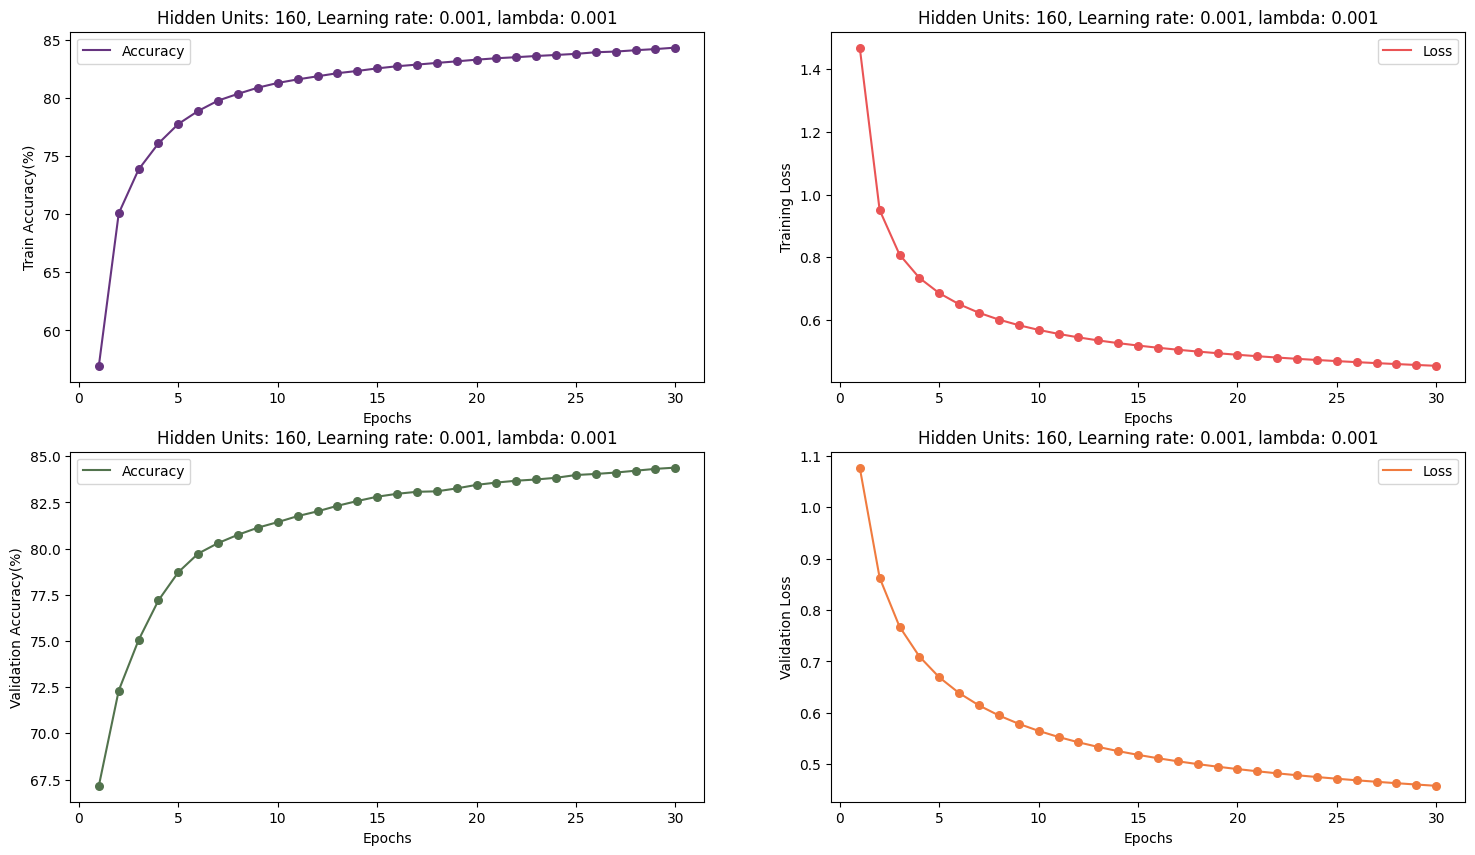

160 0.001 0.01


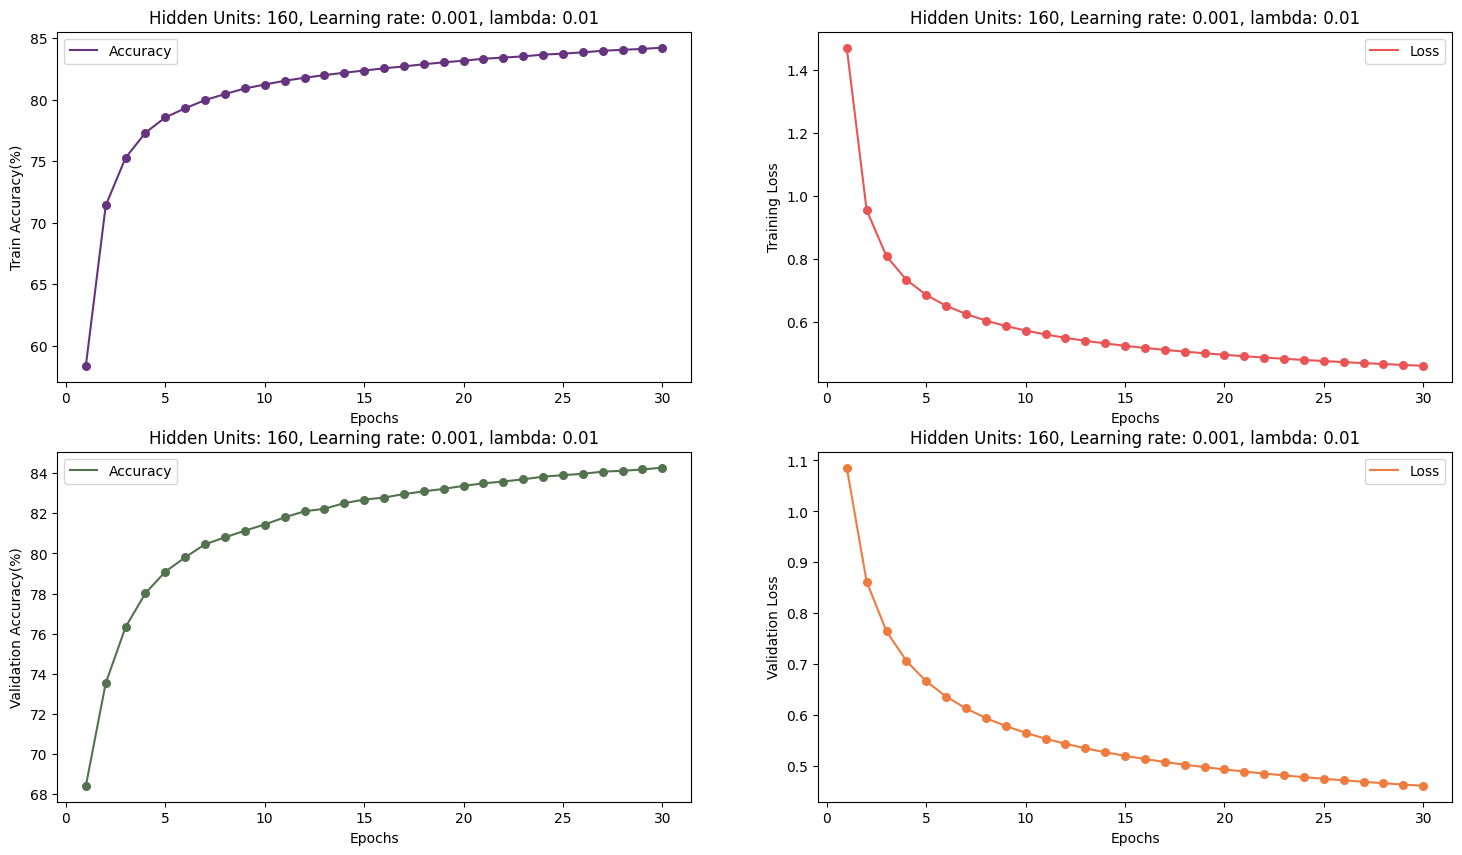

160 0.01 0.0001


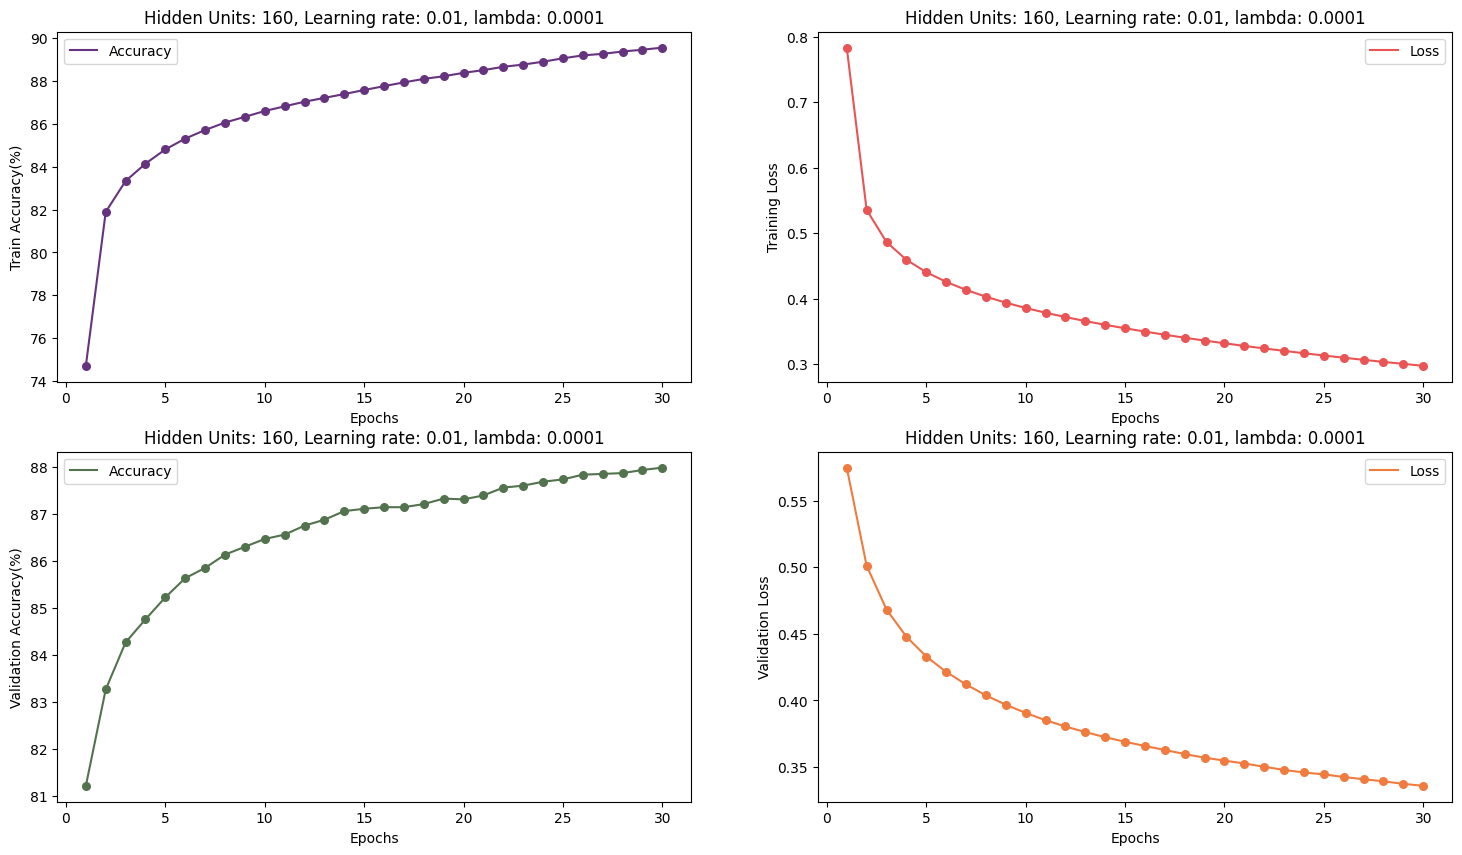

160 0.01 0.001


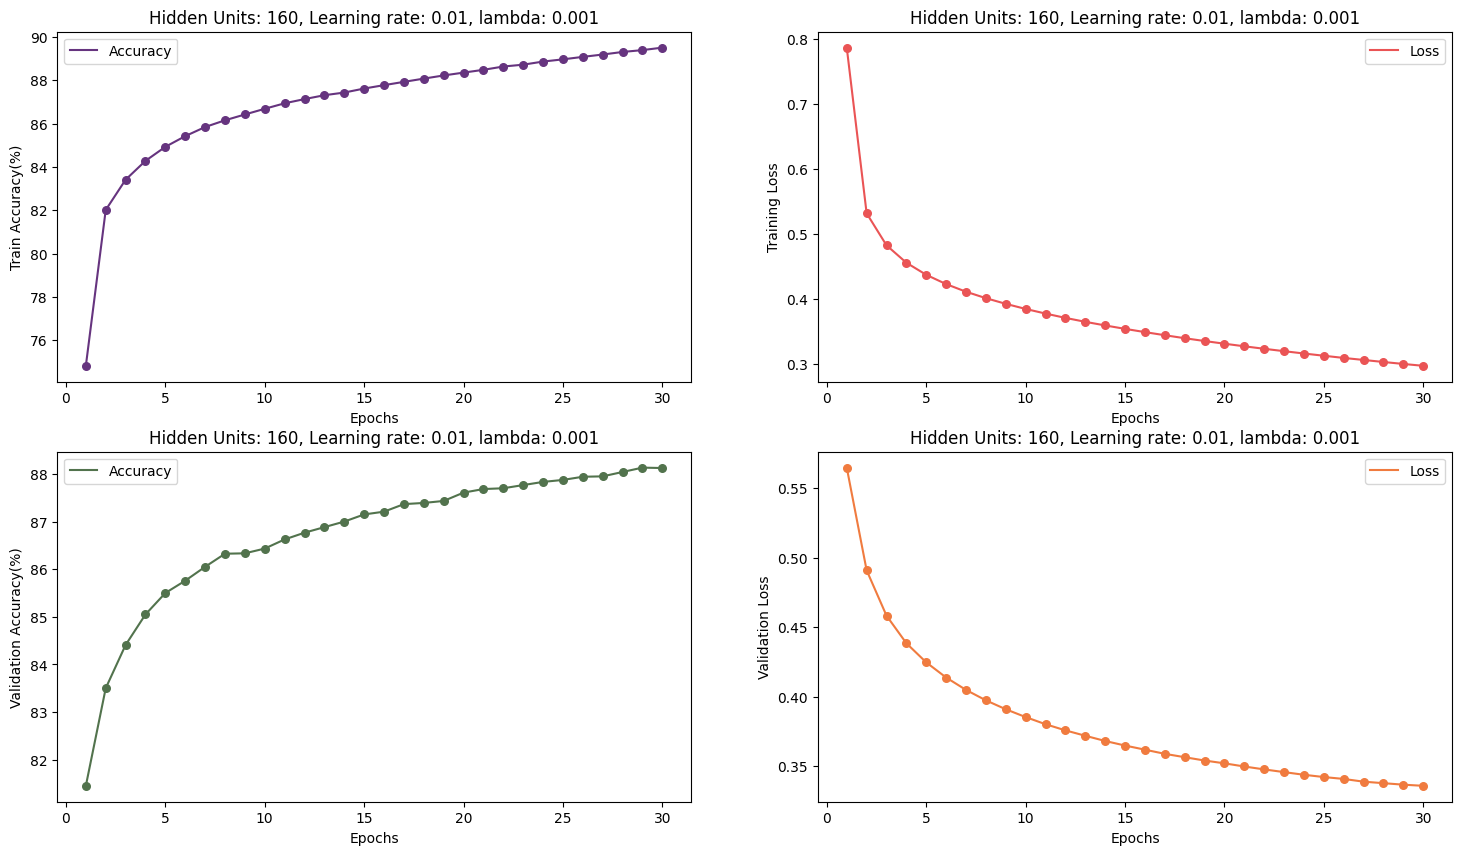

160 0.01 0.01


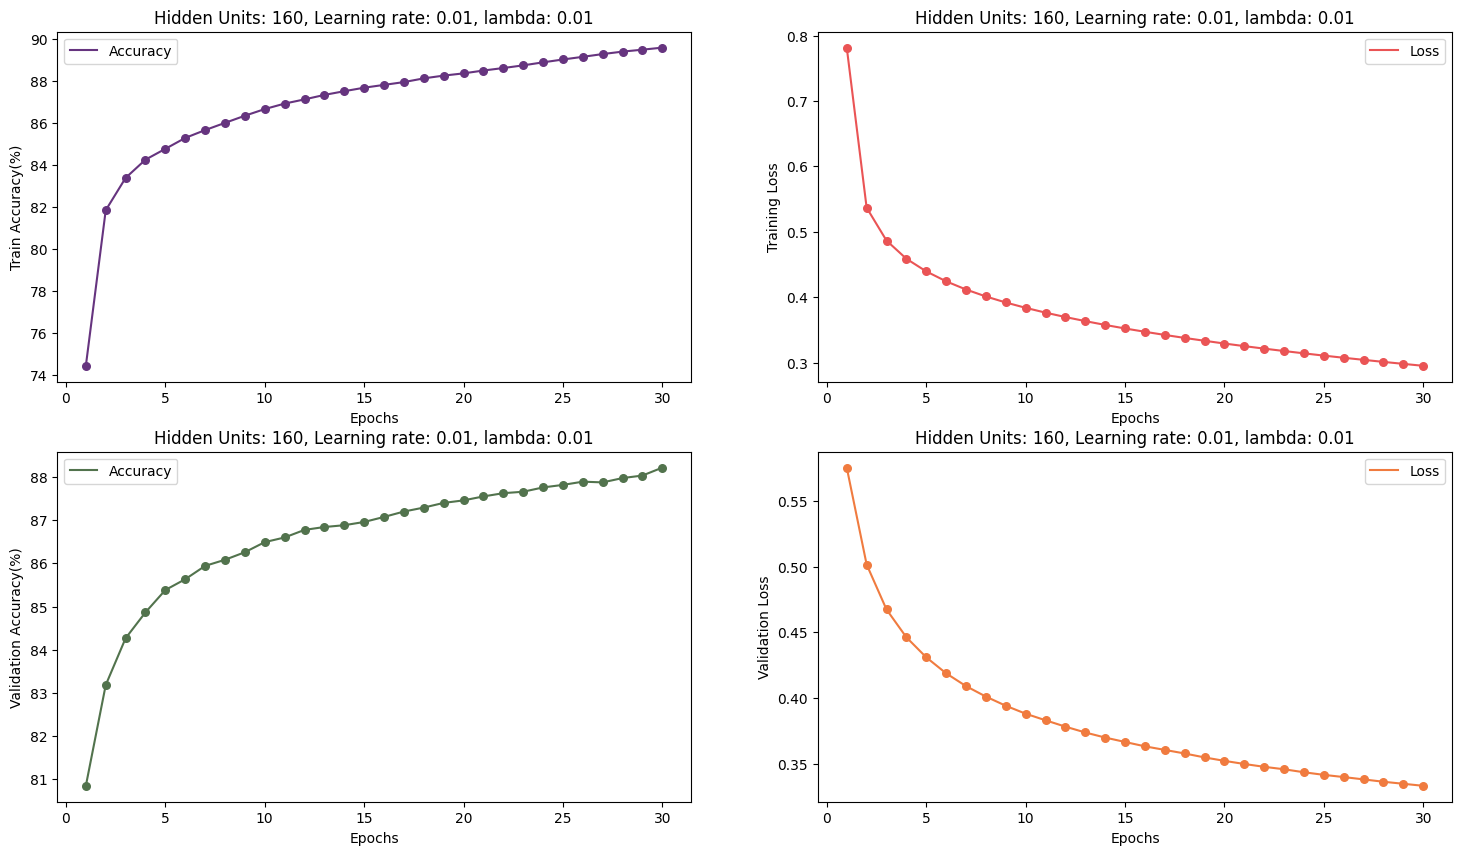

160 0.1 0.0001


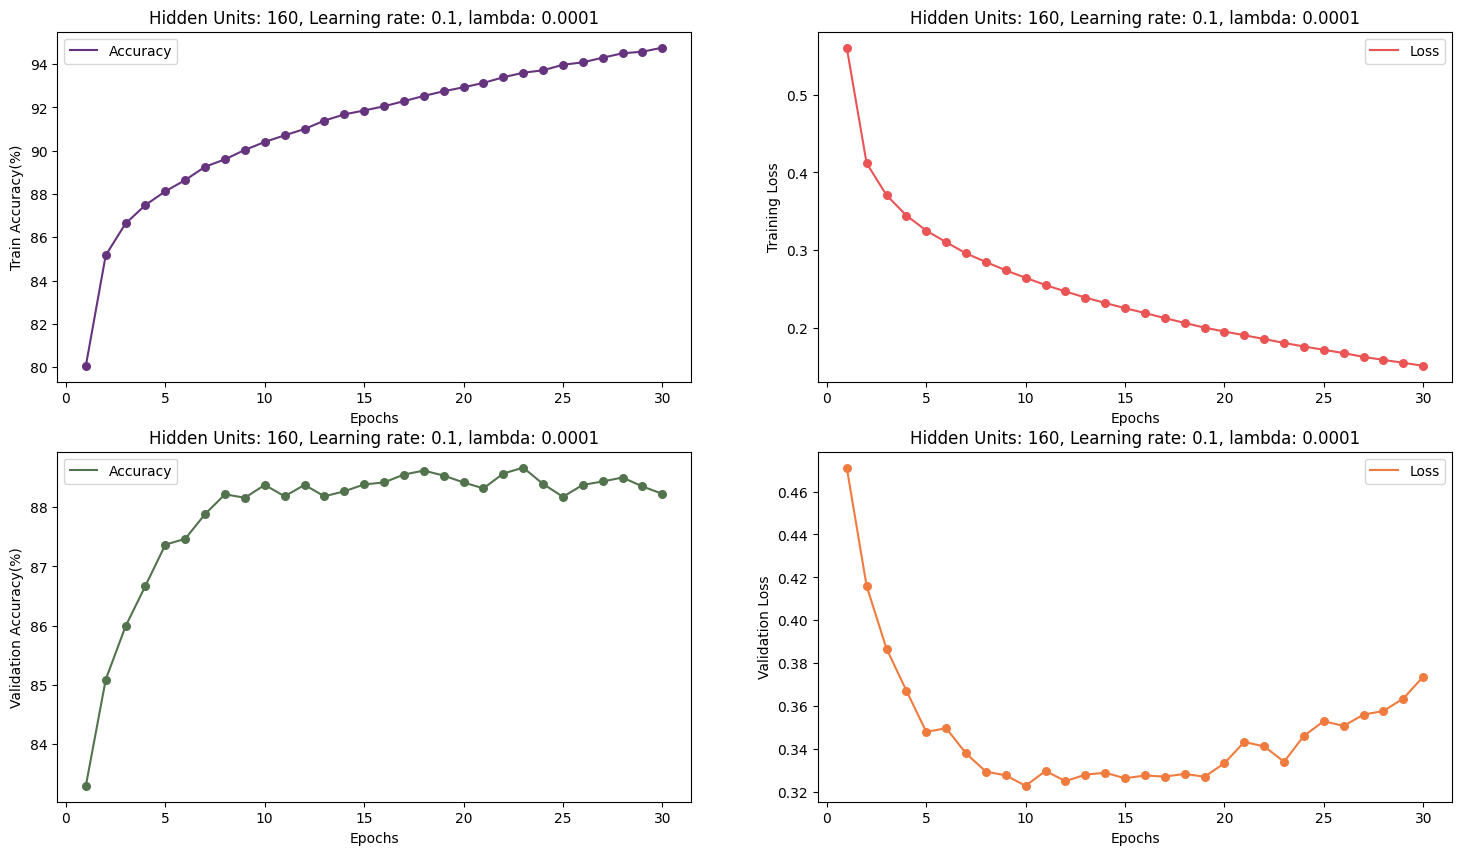

160 0.1 0.001


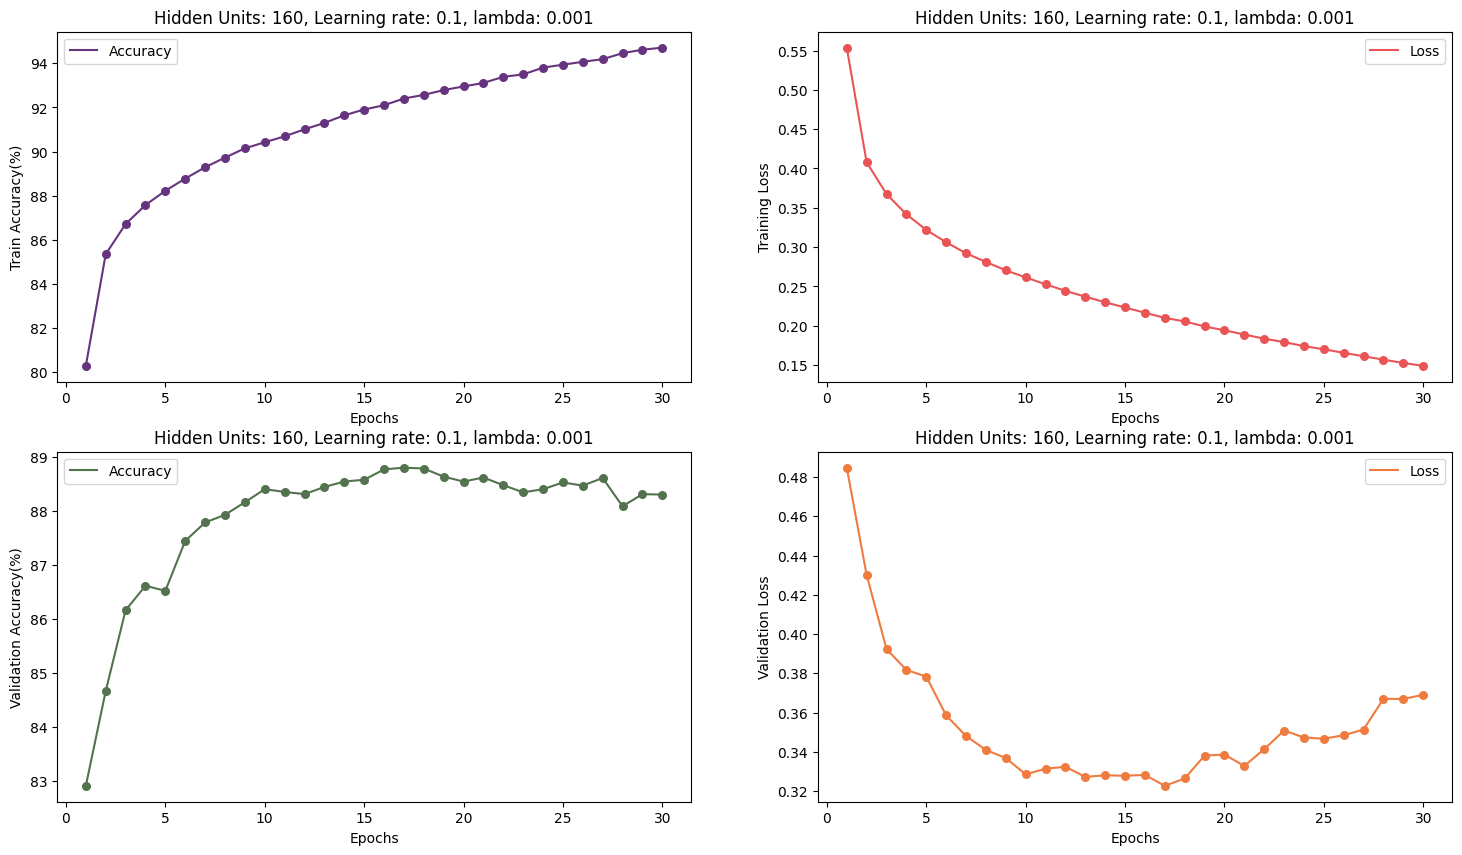

160 0.1 0.01


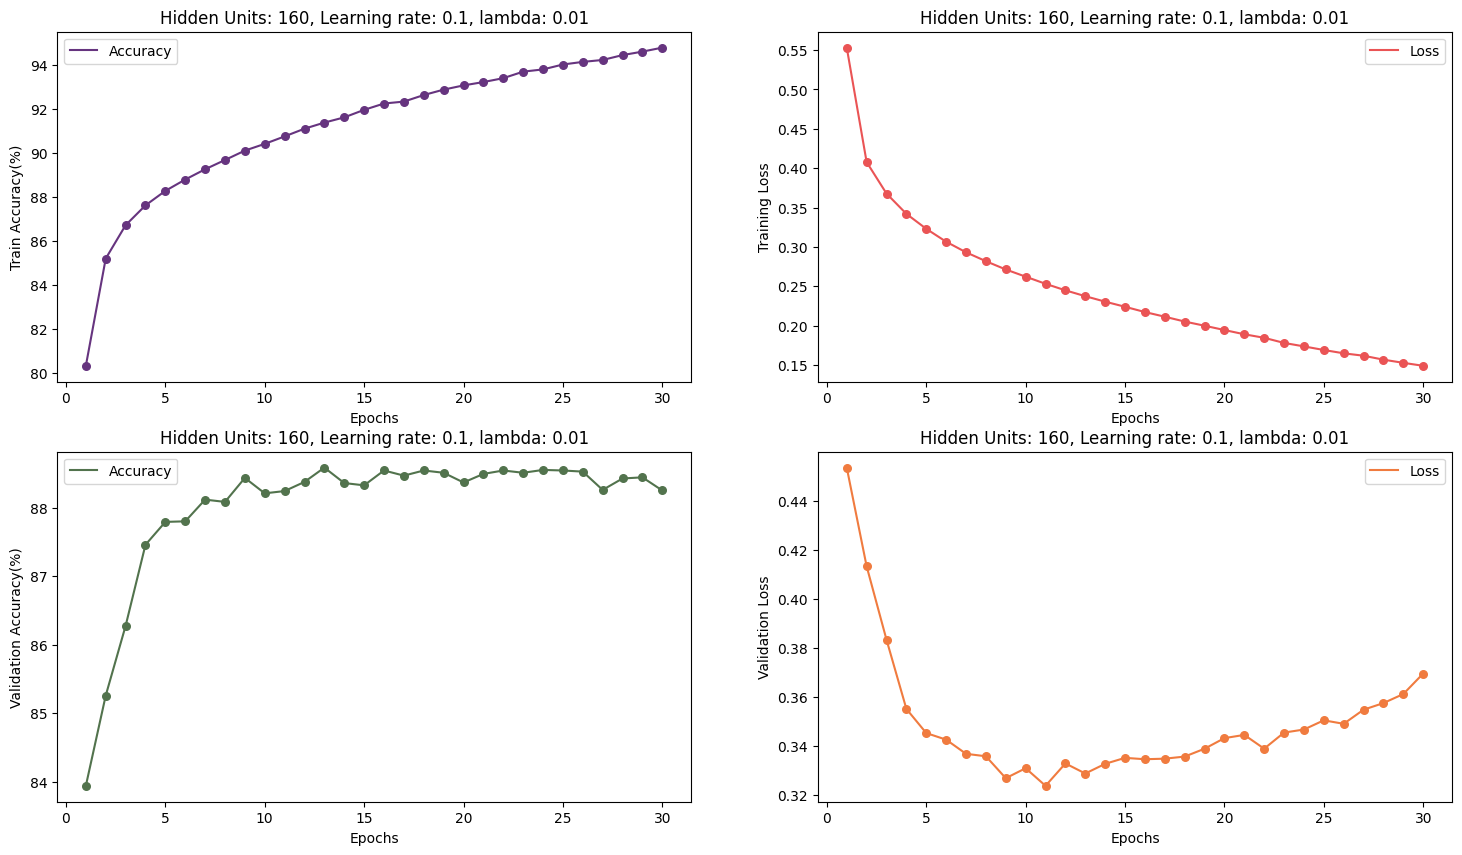

In [21]:

for hidden_units, vals in result.items():
    for learning_rate, values in vals.items():
        for reg_param, val in values.items():
            print(hidden_units, learning_rate, reg_param)
            clf.plotGraphs(hidden_units, learning_rate, reg_param, val)

# plotGraphs(2)
